In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from pylab import *
import matplotlib
import plplot
from scipy import stats
#from io import StringIO
print(pd.__version__)
#AttributeError: 'Series' object has no attribute 'to_numpy'
import re

import math
import astropy as astro
import scipy.ndimage as spimage
from astropy.io import fits, ascii
from astropy.table import Table, join
from astropy.cosmology import WMAP9 as cosmo
import matplotlib as mpl
#from numpy import std as biweight_midvariance
import matplotlib.cm as cm

from scipy import optimize
from scipy.stats import gaussian_kde
from matplotlib import colors
import scipy.ndimage as ndimage
from collections import Counter
from matplotlib.legend import Legend
import matplotlib.patches as patches
from matplotlib import pyplot
#
#
#
import extinction


#
# seaborn
#
import pandas.util.testing as tm
import seaborn as sns

#
# Jorge
#

from sel2dhist_xy import sel2dhist_xy


#
# 3D plots!
#
import numpy as np
import scipy.linalg
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#biweight_midvariance


import warnings
warnings.simplefilter("ignore")

#
# my_utils
#
from my_utils import *

#
#
#
from ndtest import *
from sklearn.decomposition import PCA

#
#
#
from scipy.optimize import leastsq, fmin
import matplotlib.animation as animation

#
# Carlos Color map
#
from cmaps_CLC import vel_map

def search_col(tab,key):
    for cols in tab.columns:
        if (cols.find(key)>-1):
            print(cols)


1.1.1
1.1.1


<ipython-input-1-5c85b1951a6e>:40: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from matplotlib import rcParams as rc
rc.update({'font.size': 20,\
           'font.weight': 900,\
           'text.usetex': True,\
           'path.simplify'           :   True,\
           'xtick.labelsize' : 20,\
           'ytick.labelsize' : 20,\
#           'xtick.major.size' : 3.5,\
#           'ytick.major.size' : 3.5,\
           'axes.linewidth'  : 2.0,\
               # Increase the tick-mark lengths (defaults are 4 and 2)
           'xtick.major.size'        :   6,\
           'ytick.major.size'        :   6,\
           'xtick.minor.size'        :   3,\
           'ytick.minor.size'        :   3,\
           'xtick.major.width'       :   1,\
           'ytick.major.width'       :   1,\
           'lines.markeredgewidth'   :   1,\
           'legend.numpoints'        :   1,\
           'xtick.minor.width'       :   1,\
           'ytick.minor.width'       :   1,\
           'legend.frameon'          :   False,\
           'legend.handletextpad'    :   0.3,\
           'font.family'    :   'serif',\
           'mathtext.fontset'        :   'stix',\
           'axes.facecolor' : "w",\
           
          })


In [3]:
tab_s_MaNGA = ascii.read('tables/s_MaNGA.csv')
cubenames=[]
for ID in tab_s_MaNGA['ID']:
    cubename = 'KG-MaNGA-'+ID
    cubenames.append(cubename)
tab_s_MaNGA['cubename'] = np.array(cubenames)
tab_s_MaNGA

name,ID,Z,cubename
str17,str8,float64,str17
manga-10843-12703,1-1037,0.03903000056743622,KG-MaNGA-1-1037
manga-8078-12704,1-109073,0.0435900017619133,KG-MaNGA-1-109073
manga-8078-1901,1-109112,0.024970000609755516,KG-MaNGA-1-109112
manga-8078-1902,1-109167,0.024630000814795494,KG-MaNGA-1-109167
manga-9193-1901,1-109234,0.04092999920248985,KG-MaNGA-1-109234
manga-11836-1901,1-1093,0.032189998775720596,KG-MaNGA-1-1093
manga-12685-12701,1-109679,0.0515500009059906,KG-MaNGA-1-109679
manga-11836-12705,1-1151,0.04464999958872795,KG-MaNGA-1-1151
manga-12083-1902,1-116700,0.036890000104904175,KG-MaNGA-1-116700


READING TABLES

In [4]:
#
# Reading get_proc_elines table!
# 
dir_DR17 = '/home/sanchez/sda2/articulos/MaNGA/DR17_Pipe3D_I/analysis/'
get_proc_elines= dir_DR17+"tables/get_proc_elines_MaNGA.clean.csv"
col_proc_elines=header_columns(get_proc_elines,2)
tab_pe=ascii.read(get_proc_elines, delimiter=',', guess=True, comment='\s*#', names=col_proc_elines,\
                      fill_values=[('BAD', np.nan)])

tab_pe=tab_pe[tab_pe['name']==tab_pe['MaNGA_name']]
#print(len(tab_pe_test))
print(tab_pe[tab_pe['name']=='manga-11757-9102'])
#tab_pe.remove_columns(['MaNGA_name'])

#list_columns(tab_pe.columns)

   MaNGA_name    nsa_redshift nsa_u_absmag ... NH_R_ALL_mean NH_R_ALL_error
---------------- ------------ ------------ ... ------------- --------------
manga-11757-9102  0.056329615              ...            --             --


In [5]:
print(tab_pe[tab_pe['name']=='manga-11757-9102'])
print(tab_pe[tab_pe['name']=='manga-7979-12703'])
print(tab_pe[tab_pe['name']=='manga-10837-3701'])
print(tab_pe[tab_pe['name']=='manga-11834-9102'])
print(tab_pe[tab_pe['name']=='manga-11941-1902'])
print(tab_pe[tab_pe['name']=='manga-10496-6102'])
print(tab_pe[tab_pe['name']=='manga-11980-6102'])

#manga-11834-9102 

   MaNGA_name    nsa_redshift nsa_u_absmag ... NH_R_ALL_mean NH_R_ALL_error
---------------- ------------ ------------ ... ------------- --------------
manga-11757-9102  0.056329615              ...            --             --
   MaNGA_name    nsa_redshift nsa_u_absmag ...  NH_R_ALL_mean  NH_R_ALL_error
---------------- ------------ ------------ ... --------------- --------------
manga-7979-12703    0.0251824              ... 8.4912609641927           -inf
   MaNGA_name    nsa_redshift ...  NH_R_ALL_mean     NH_R_ALL_error 
---------------- ------------ ... ---------------- -----------------
manga-10837-3701   0.06582478 ... 7.96165325472652 0.217051927962703
   MaNGA_name    nsa_redshift nsa_u_absmag ...  NH_R_ALL_mean    NH_R_ALL_error 
---------------- ------------ ------------ ... --------------- -----------------
manga-11834-9102  0.029348467              ... 7.6989545847112 0.208330140528545
   MaNGA_name    nsa_redshift nsa_u_absmag ... NH_R_ALL_mean NH_R_ALL_error
------------

In [6]:
#
# Reading Mag table
#
get_mag_cubes=dir_DR17+"tables/get_mag_cubes_v3_1_1_redshift.csv"
col_mag_cubes=header_columns_space(get_mag_cubes,2)
tab_mag=ascii.read(get_mag_cubes, delimiter=',', guess=True, comment='\s*#', names=col_mag_cubes,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)
tab_mag.rename_column('name-obj', 'name')
tab_mag.rename_column('R_band_mag', 'RJ_band_mag')
tab_mag.rename_column('R_band_mag_error', 'RJ_band_mag_error')
tab_mag.rename_column('R_band_abs_mag', 'RJ_band_abs_mag')
tab_mag.rename_column('R_band_abs_mag_error', 'RJ_band_abs_mag_error')
list_columns(col_mag_cubes)


print(tab_mag[tab_mag['name']=='manga-11834-9102'])
print(tab_mag[tab_mag['name']=='manga-11941-1902'])


name-obj                   i_band_mag_error           Y_centroid                 SN_at_R50                  
redshift                   i_band_abs_mag             Re                         error_SN_at_R50            
error_redshift             i_band_abs_mag_error       error_Re                   Re1                        
u_band_mag                 B_band_mag                 mean_S/N_at_Re             error_Re1                  
u_band_mag_error           B_band_mag_error           sigma_S/N_at_Re            B-V                        
u_band_abs_mag             B_band_abs_mag             ellipticy                  error_B-V                  
u_band_abs_mag_error       B_band_abs_mag_error       Pa                         B-R                        
g_band_mag                 V_band_mag                 R50                        error_B-R                  
g_band_mag_error           V_band_mag_error           error_R50                  log10_Mass/Msun_phot.      
g_band_abs_mag     

In [7]:
#
# Reading Indices at Re
#
get_ind_Re=dir_DR17+"tables/get_val_ind_Re_MaNGA.csv"
col_ind_Re=header_columns_space(get_ind_Re,2)
tab_ind_Re=ascii.read(get_ind_Re, delimiter=',', guess=True, comment='\s*#', names=col_ind_Re,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
tab_ind_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_ind_Re.columns)

print(tab_ind_Re[tab_ind_Re['name']=='manga-11834-9102'])
print(tab_ind_Re[tab_ind_Re['name']=='manga-11941-1902'])

name        Mgb         e_Fe5335    Hg          
Hd          e_Mgb       e4000       e_Hg        
e_Hd        Fe5270      e_e4000     SN          
Hb          e_Fe5270    Hdmod       e_SN        
e_Hb        Fe5335      e_Hdmod                 
      name              Hd        ...         SN                 e_SN       
---------------- ---------------- ... ------------------ -------------------
manga-11834-9102 5.36476058515708 ... 0.0350306768884251 0.00489828028869856
      name               Hd        ...         SN               e_SN       
---------------- ----------------- ... ----------------- ------------------
manga-11941-1902 -1.39429852038545 ... 0.128446213761922 0.0240489379700139


In [8]:
#
# Reading Indices at Re
#
get_ind=dir_DR17+"tables/get_proc_indices_MaNGA.clean.csv"
col_ind=header_columns_space(get_ind,2)
tab_ind=ascii.read(get_ind, delimiter=',', guess=True, comment='\s*#', names=col_ind,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
#tab_ind_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_ind.columns)


MaNGA_name            e_D4000_fit           e_Hb_Re_fit           e_D4000_Re_fit        
nsa_redshift          slope_D4000           Hb_alpha_fit          D4000_alpha_fit       
nsa_u_absmag          e_slope_D4000         e_Hb_alpha_fit        e_D4000_alpha_fit     
nsa_z_absmag          D4000_OH_fit          Mgb_Re_fit            Hdmod_Re_fit          
nsa_u_z_absmag        e_D4000_fit1          e_Mgb_Re_fit          e_Hdmod_Re_fit        
nsa_mstar             slope_D4000_OH        Mgb_alpha_fit         Hdmod_alpha_fit       
nsa_inclination       e_slope_D4000_OH      e_Mgb_alpha_fit       e_Hdmod_alpha_fit     
nsa_petro_th50        Sgas_OH_fit           Fe5270_Re_fit         Hg_Re_fit             
nsa_sersic_ba         e_Sgas_fit            e_Fe5270_Re_fit       e_Hg_Re_fit           
nsa_sersic_n          slope_Sgas_OH         Fe5270_alpha_fit      Hg_alpha_fit          
nsa_sersic_phi        e_slope_Sgas          e_Fe5270_alpha_fit    e_Hg_alpha_fit        
nsa_sersic_th50      

In [9]:
tab_ind.colnames

['MaNGA_name',
 'nsa_redshift',
 'nsa_u_absmag',
 'nsa_z_absmag',
 'nsa_u_z_absmag',
 'nsa_mstar',
 'nsa_inclination',
 'nsa_petro_th50',
 'nsa_sersic_ba',
 'nsa_sersic_n',
 'nsa_sersic_phi',
 'nsa_sersic_th50',
 'name',
 'D4000',
 'e_D4000',
 'D4000_Re_fit',
 'e_D4000_fit',
 'slope_D4000',
 'e_slope_D4000',
 'D4000_OH_fit',
 'e_D4000_fit1',
 'slope_D4000_OH',
 'e_slope_D4000_OH',
 'Sgas_OH_fit',
 'e_Sgas_fit',
 'slope_Sgas_OH',
 'e_slope_Sgas',
 'Hd_Re_fit',
 'e_Hd_Re_fit',
 'Hd_alpha_fit',
 'e_Hd_alpha_fit',
 'Hb_Re_fit',
 'e_Hb_Re_fit',
 'Hb_alpha_fit',
 'e_Hb_alpha_fit',
 'Mgb_Re_fit',
 'e_Mgb_Re_fit',
 'Mgb_alpha_fit',
 'e_Mgb_alpha_fit',
 'Fe5270_Re_fit',
 'e_Fe5270_Re_fit',
 'Fe5270_alpha_fit',
 'e_Fe5270_alpha_fit',
 'Fe5335_Re_fit',
 'e_Fe5335_Re_fit',
 'Fe5335_alpha_fit',
 'e_Fe5335_alpha_fit',
 'D4000_Re_fit1',
 'e_D4000_Re_fit',
 'D4000_alpha_fit',
 'e_D4000_alpha_fit',
 'Hdmod_Re_fit',
 'e_Hdmod_Re_fit',
 'Hdmod_alpha_fit',
 'e_Hdmod_alpha_fit',
 'Hg_Re_fit',
 'e_Hg_Re_fit

In [10]:
#
# Reading Indices at Re
#
get_Re=dir_DR17+"tables/get_val_Re_MaNGA.csv"
col_Re=header_columns_space(get_Re,2)
tab_val_Re=ascii.read(get_Re, delimiter=',', guess=True, comment='\s*#', names=col_Re,\
                      fill_values=[('BAD', np.nan)])
#print(tab_ind_Re)
tab_val_Re.rename_column('MaNGA_name', 'name')
list_columns(tab_val_Re.columns)


name                    e_Age_LW                e_disp_Ha               e_ML                    
Sigma_Mass_stars        Age_MW                  vel_Ha                  Sigma_SFR_ssp           
e_Sigma_Mass_stars      e_Age_MW                e_vel_Ha                e_Sigma_SFR_ssp         
Sigma_SFR               OH_t2                   vel_ssp                 Sigma_Mass_gas_rad      
e_Sigma_SFR             e_OH_t2                 e_vel_ssp               e_Sigma_Mass_gas_rad    
Sigma_Mass_gas          OH_O3N2                 SK_ssp                  Lambda                  
e_Sigma_Mass_gas        e_OH_O3N2               e_SK_ssp                e_Lambda                
Sigma_Mass_gas_ssp      Av_gas                  SK_Ha                   OH_ONS                  
e_Sigma_Mass_gas_ssp    e_Av_gas                e_SK_Ha                 e_OH_ONS                
ZH_LW                   Av_ssp                  KIN_ssp                 NO_ONS                  
e_ZH_LW                 e_Av_s

In [11]:
#
# Reading Indices at Re
#
get_in_Re=dir_DR17+"tables/get_val_within_Re_MaNGA.csv"
col_in_Re=header_columns_space(get_in_Re,2)
tab_val_in_Re=ascii.read(get_in_Re, delimiter=',', guess=True, comment='\s*#', names=col_in_Re,\
                      fill_values=[('BAD', np.nan)])
list_col_names=tab_val_in_Re.columns.copy()
for col_name in list_col_names:
    new_col_name="in_"+col_name
    tab_val_in_Re.rename_column(col_name, new_col_name)
#print(tab_ind_Re)
tab_val_in_Re.rename_column('in_MaNGA_name', 'name')
list_columns(tab_val_in_Re.columns)


name                       in_e_Age_LW                in_e_disp_Ha               in_e_ML                    
in_Sigma_Mass_stars        in_Age_MW                  in_vel_Ha                  in_Sigma_SFR_ssp           
in_e_Sigma_Mass_stars      in_e_Age_MW                in_e_vel_Ha                in_e_Sigma_SFR_ssp         
in_Sigma_SFR               in_OH_t2                   in_vel_ssp                 in_Sigma_Mass_gas_rad      
in_e_Sigma_SFR             in_e_OH_t2                 in_e_vel_ssp               in_e_Sigma_Mass_gas_rad    
in_Sigma_Mass_gas          in_OH_O3N2                 in_SK_ssp                  in_Lambda                  
in_e_Sigma_Mass_gas        in_e_OH_O3N2               in_e_SK_ssp                in_e_Lambda                
in_Sigma_Mass_gas_ssp      in_Av_gas                  in_SK_Ha                   in_OH_ONS                  
in_e_Sigma_Mass_gas_ssp    in_e_Av_gas                in_e_SK_Ha                 in_e_OH_ONS                
in_ZH_LW           

In [12]:
#
# Reading flux_elines_table
#
get_p_fe=dir_DR17+"tables/get_proc_flux_elines_MaNGA.clean.csv"
col_p_fe=header_columns_space(get_p_fe,2)
tab_fe=ascii.read(get_p_fe, delimiter=',', guess=True, comment='\s*#', names=col_p_fe,\
                      fill_values=[('BAD', np.nan)])
print(len(tab_fe))


tab_fe=tab_fe[tab_fe['name']==tab_fe['MaNGA_name']]
list_columns(tab_fe.columns)
tab_fe.remove_columns(['MaNGA_name'])

#tab_mag.rename_column('name-obj', 'name')

10154
MaNGA_name                          e_flux_HI3889.05_alpha_fit          e_flux_[OIII]5006.84_alpha_fit      e_flux_Halpha6562.85_alpha_fit      
nsa_redshift                        flux_HeI3964.73_Re_fit              flux_HeI5015.68_Re_fit              flux_[NII]6583.45_Re_fit            
nsa_u_absmag                        e_flux_HeI3964.73_Re_fit            e_flux_HeI5015.68_Re_fit            e_flux_[NII]6583.45_Re_fit          
nsa_z_absmag                        flux_HeI3964.73_alpha_fit           flux_HeI5015.68_alpha_fit           flux_[NII]6583.45_alpha_fit         
nsa_u_z_absmag                      e_flux_HeI3964.73_alpha_fit         e_flux_HeI5015.68_alpha_fit         e_flux_[NII]6583.45_alpha_fit       
nsa_mstar                           flux_[NeIII]3967.46_Re_fit          flux_[NI]5197.9_Re_fit              flux_[SII]6716.44_Re_fit            
nsa_inclination                     e_flux_[NeIII]3967.46_Re_fit        e_flux_[NI]5197.9_Re_fit            e_flux_[SII]6716

In [13]:
#
# Reading flux_elines_table
#
get_p_fe_org=dir_DR17+"tables/get_proc_flux_elines_org_MaNGA.clean.csv"
col_p_fe_org=header_columns_space(get_p_fe_org,2)
tab_fe_org=ascii.read(get_p_fe_org, delimiter=',', guess=True, comment='\s*#', names=col_p_fe_org,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)
#tab_mag.rename_column('name-obj', 'name')
#list_columns(col_p_fe_org)
tab_fe_org=tab_fe_org[tab_fe_org['name']==tab_fe_org['MaNGA_name']]
tab_fe_org.remove_columns(['MaNGA_name'])
print(len(tab_fe_org))
list_columns(tab_fe_org.columns)


#tab_mag.rename_column('name-obj', 'name')

10156
nsa_redshift                         EW_[SII]4076_Re_fit                  disp_[OIII]4958_Re_fit               l_flux_[SIII]6312_Ha_Re_fit          
nsa_u_absmag                         e_EW_[SII]4076_Re_fit                e_disp_[OIII]4958_Re_fit             e_l_flux_[SIII]6312_Ha_Re_fit        
nsa_z_absmag                         EW_[SII]4076_alpha_fit               disp_[OIII]4958_alpha_fit            l_flux_[SIII]6312_Ha_alpha_fit       
nsa_u_z_absmag                       e_EW_[SII]4076_alpha_fit             e_disp_[OIII]4958_alpha_fit          e_l_flux_[SIII]6312_Ha_alpha_fit     
nsa_mstar                            EW_Hd4101_Re_fit                     disp_Hb4861_Re_fit                   l_flux_SiII6347_Ha_Re_fit            
nsa_inclination                      e_EW_Hd4101_Re_fit                   e_disp_Hb4861_Re_fit                 e_l_flux_SiII6347_Ha_Re_fit          
nsa_petro_th50                       EW_Hd4101_alpha_fit                  disp_Hb4861_alpha_fit     

In [14]:
#
# Reading flux_elines_table
#
get_p_OH=dir_DR17+"tables/get_proc_OH_MaNGA.clean.csv"
col_p_OH=header_columns_space(get_p_OH,2)
tab_OH=ascii.read(get_p_OH, delimiter=',', guess=True, comment='\s*#', names=col_p_OH,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)

tab_OH=tab_OH[tab_OH['name']==tab_OH['MaNGA_name']]
tab_OH.remove_columns(['MaNGA_name'])
#list_columns(col_p_fe_org)


print(len(tab_OH))
list_columns(tab_OH.columns)


#tab_mag.rename_column('name-obj', 'name')

10242
nsa_redshift                    e_OH_Pet04_O3N2_alpha_fit       OH_Cur20_R2_alpha_fit           e_U_Dors_O32_Re_fit             
nsa_u_absmag                    OH_Kew02_N2O2_Re_fit            e_OH_Cur20_R2_alpha_fit         U_Dors_O32_alpha_fit            
nsa_z_absmag                    e_OH_Kew02_N2O2_Re_fit          OH_Cur20_N2_Re_fit              e_U_Dors_O32_alpha_fit          
nsa_u_z_absmag                  OH_Kew02_N2O2_alpha_fit         e_OH_Cur20_N2_Re_fit            U_Dors_S_Re_fit                 
nsa_mstar                       e_OH_Kew02_N2O2_alpha_fit       OH_Cur20_N2_alpha_fit           e_U_Dors_S_Re_fit               
nsa_inclination                 OH_Pil10_ONS_Re_fit             e_OH_Cur20_N2_alpha_fit         U_Dors_S_alpha_fit              
nsa_petro_th50                  e_OH_Pil10_ONS_Re_fit           OH_Cur20_R23_Re_fit             e_U_Dors_S_alpha_fit            
nsa_sersic_ba                   OH_Pil10_ONS_alpha_fit          e_OH_Cur20_R23_Re_fit      

In [15]:
#
# Reading morphological table
#
#morph={'-2':'CD','-1':'E','0':'S0','1':'Sa','2':'Sab','3':'Sb','4':'Sbc','5':'Sc','6':'Scd',\
#       '7':'Sd','8':'Sdm','9':'Sm','10':'Irr'}
morph={-2:'CD',-1:'E',0:'S0',1:'Sa',2:'Sab',3:'Sb',4:'Sbc',5:'Sc',6:'Scd',\
       7:'Sd',8:'Sdm',9:'Sm',10:'Irr'}
morph_file=dir_DR17+"tables/manga-morphall-v3_1_1.fits"
tab_morph = Table.read(morph_file, format='fits')
tab_morph.rename_column('index', 'name')
tab_morph.rename_column('nsa_sersic_n', 'nsa_sersic_n_morph')
tab_morph.rename_column('best type_n','best_type_n')
tab_morph.rename_column('best type','best_type')

list_columns(tab_morph.columns)
print(morph)


name                  r-i                   P(Sab)                P(Sm)                 
nsa_sersic_n_morph    i-z                   P(Sb)                 P(Irr)                
log_Mass_corr         C (R50/R90)           P(Sbc)                best_type_n           
rat_vel_sigma         P(CD)                 P(Sc)                 best_type             
Ellipticity           P(E)                  P(Scd)                                      
u-g                   P(S0)                 P(Sd)                                       
g-r                   P(Sa)                 P(Sdm)                                      
{-2: 'CD', -1: 'E', 0: 'S0', 1: 'Sa', 2: 'Sab', 3: 'Sb', 4: 'Sbc', 5: 'Sc', 6: 'Scd', 7: 'Sd', 8: 'Sdm', 9: 'Sm', 10: 'Irr'}


In [16]:
drpall=dir_DR17+'tables/drpall-v3_1_1.fits'
tab_dr = Table.read(drpall, format='fits')
tab_dr['name']=tab_dr['plateifu']
for indx,val in enumerate(tab_dr['name']):
    tab_dr['name'][indx]='manga-'+tab_dr['name'][indx]
list_columns(tab_dr.columns)
print(tab_dr['name'])

plate                    cartid                   manga_tileid             nsa_nsaid                
ifudsgn                  designid                 nsa_iauname              nsa_nsaid_v1b            
plateifu                 cenra                    ifudesignsize            nsa_z                    
mangaid                  cendec                   ifutargetsize            nsa_zdist                
versdrp2                 airmsmin                 ifudesignwrongsize       nsa_sersic_absmag        
versdrp3                 airmsmed                 z                        nsa_elpetro_absmag       
verscore                 airmsmax                 zmin                     nsa_elpetro_amivar       
versutil                 seemin                   zmax                     nsa_sersic_mass          
versprim                 seemed                   szmin                    nsa_elpetro_mass         
platetyp                 seemax                   szmax                    nsa_elpetro_ba  

In [17]:
vol_file=dir_DR17+"tables/MaNGA_MPL11_Volume_C.fits"
tab_vol = Table.read(vol_file, format='fits')
tab_vol['name']=tab_vol['plateifu']
for indx,val in enumerate(tab_vol['name']):
    name_now='manga-'+tab_vol['name'][indx]
    name_now=name_now.replace(" ","")
    tab_vol['name'][indx]=name_now
    

print(tab_vol['name'],tab_vol['Vmax_w'])
list_columns(tab_vol.columns)


       name      
-----------------
manga-10001-12701
manga-10001-12702
manga-10001-12703
manga-10001-12704
manga-10001-12705
 manga-10001-1901
 manga-10001-1902
 manga-10001-3701
 manga-10001-3702
 manga-10001-3703
              ...
 manga-9894-12705
  manga-9894-1902
  manga-9894-3701
  manga-9894-3703
  manga-9894-3704
  manga-9894-6101
  manga-9894-6102
  manga-9894-6103
  manga-9894-6104
  manga-9894-9101
  manga-9894-9102
Length = 9341 rows    Vmax_w  
-----------
 4.2211e-06
 3.7132e-06
1.93554e-06
1.68639e-06
1.93554e-06
8.71277e-06
  7.905e-06
6.45567e-07
 5.6706e-06
2.38905e-06
        ...
7.56699e-06
1.13259e-05
4.09177e-06
 2.7185e-06
7.29204e-07
1.66874e-06
1.26995e-05
1.26995e-05
2.05023e-06
 8.6621e-08
8.28911e-06
Length = 9341 rows
plate        mangaid      logMs_nsa    Num_w        
ifudsgn      nsa_nsaid    z_obs_nsa    name         
plateifu     nsaid        Vmax_w                    


In [18]:
get_QC=dir_DR17+"tables/QC_MaNGA_v3_1_1.clean.csv"
col_QC=header_columns_space(get_QC,2)
tab_QC=ascii.read(get_QC, delimiter=',', guess=True, comment='\s*#', names=col_QC,\
                      fill_values=[('BAD', np.nan)])
print(len(tab_QC))
list_columns(tab_QC.columns)





10243
name      QCFLAG    


In [19]:
# ********************** 9.12.2021
# Correct ZH_LW_Re
#
tab_pe['ZH_LW_Re_fit']=tab_pe['ZH_LW_Re']      

In [20]:
#
# Joininig all tables
#
tab_mag['u-i']=tab_mag['u_band_mag']-tab_mag['i_band_mag']
tab_pe.remove_columns(['nsa_u_absmag','nsa_z_absmag', 'nsa_u_z_absmag'])
tab_all=join(tab_pe,tab_mag,keys=['name'],join_type='left')
print("get_proc and get_mag joint")
tab_all=join(tab_all,tab_morph,keys=['name'],join_type='left')
print("... morph added")
tab_all=join(tab_all,tab_dr,keys=['name'],join_type='left')
print("... DR added")
tab_fe.remove_columns(['nsa_u_absmag','nsa_z_absmag', 'nsa_u_z_absmag'])
tab_fe.remove_columns(['nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50'])
tab_all=join(tab_all,tab_fe,keys=['name'],join_type='left')
print("... flux_elines_long added")
tab_fe_org.remove_columns(['nsa_u_absmag','nsa_z_absmag', 'nsa_u_z_absmag'])
tab_fe_org.remove_columns(['nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                           'nsa_sersic_phi','nsa_sersic_th50'])
tab_all=join(tab_all,tab_fe_org,keys=['name'],join_type='left')
print("... flux_elines org added")
tab_OH.remove_columns(['nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50','nsa_redshift', 'nsa_u_absmag',\
                       'nsa_z_absmag', 'nsa_u_z_absmag', 'nsa_mstar', 'nsa_inclination'])
tab_all=join(tab_all,tab_OH,keys=['name'],join_type='left')
print("... OH added")
tab_all=join(tab_all,tab_ind_Re,keys=['name'],join_type='left')
print("... Indices at Re added")
tab_ind.remove_columns(['nsa_petro_th50', 'nsa_sersic_ba', 'nsa_sersic_n',\
                       'nsa_sersic_phi','nsa_sersic_th50','nsa_redshift', 'nsa_u_absmag',\
                       'nsa_z_absmag', 'nsa_u_z_absmag', 'nsa_mstar', 'nsa_inclination'])
tab_all=join(tab_all,tab_ind,keys=['name'],join_type='left')
print("... Indices fitted added")
tab_all=join(tab_all,tab_val_Re,keys=['name'],join_type='left')
print("... Values at Re added")
tab_all=join(tab_all,tab_val_in_Re,keys=['name'],join_type='left')
print("... Values in Re added")
tab_vol.remove_columns(['plate','ifudsgn', 'plateifu'])

tab_all=join(tab_all,tab_vol,keys=['name'],join_type='right')    
print("... Values of volume added")

tab_all=join(tab_all,tab_QC,keys=['name'],join_type='right')    
print("... Values of QC added")
tab_all.rename_column('log10_Mass/Msun_phot.','log_Mass_phot')
tab_all.rename_column('error_Mass_phot.','e_log_Mass_phot')
#tab_all([data[n].filled(np.nan) for n in data.colnames])


get_proc and get_mag joint
... morph added
... DR added
... flux_elines_long added
... flux_elines org added
... OH added
... Indices at Re added
... Indices fitted added
... Values at Re added
... Values in Re added
... Values of volume added
... Values of QC added


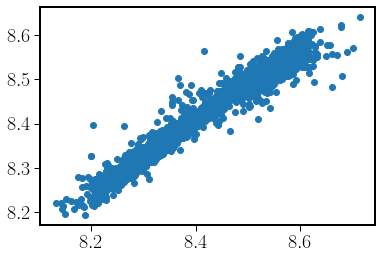

In [21]:
# Just a test!
plt.scatter(tab_all['OH_Re_fit_O3N2'],tab_all['OH_Mar13_O3N2_Re_fit']) 

In [22]:
#print(tab_pe.columns)
for cols in (tab_pe.columns):
    tab_pe[cols].units=''
    tab_pe[cols].description=''
#print(tab_pe[tab_pe['name']=='manga-11757-9102'])

tab_pe_select=tab_pe['name',            'z_gas','z_stars','FoV','nx','ny','Re_kpc','log_Mass_corr','error_Mass','lSFR','e_lSFR','log_age_mean_LW','s_log_age_mean_LW','log_ZH_mean_LW','s_log_ZH_mean_LW','Av_ssp_stats_mean','Av_ssp_stats_stddev','Av_w1','e_Av_w','log_Mass','log_SFR_ssp','log_NII_Ha_cen_mean','log_NII_Ha_cen_stddev','log_OIII_Hb_cen_mean','log_OIII_Hb_cen_stddev','log_SII_Ha_cen_mean','log_SII_Ha_cen_stddev','log_OII_Hb_cen_mean','log_OII_Hb_cen_stddev','EW_Ha_cen_mean','EW_Ha_cen_stddev','ZH_LW_Re_fit','e_ZH_LW_Re_fit','alpha_ZH_LW_Re_fit','e_alpha_ZH_LW_Re_fit','ZH_MW_Re_fit','e_ZH_MW_Re_fit','alpha_ZH_MW_Re_fit','e_alpha_ZH_MW_Re_fit','Age_LW_Re_fit','e_Age_LW_Re_fit','alpha_Age_LW_Re_fit','e_alpha_Age_LW_Re_fit','Age_MW_Re_fit','e_Age_MW_Re_fit','alpha_Age_MW_Re_fit','e_alpha_Age_MW_Re_fit','Re_arc','DL','DA','P.A.','Ellipticity','Inclination','elip_ab','log_Mass_gas','rat_vel_sigma','e_rat_vel_sigma','log_SFR_SF','log_SFR_D_C','OH_O3N2_cen','e_OH_O3N2_cen','OH_N2_cen','e_OH_N2_cen','OH_ONS_cen','e_OH_ONS_cen','OH_R23_cen','e_OH_R23_cen','OH_pyqz_cen','e_OH_pyqz_cen','OH_t2_cen','e_OH_t2_cen','OH_M08_cen','e_OH_M08_cen','OH_T04_cen','e_OH_T04_cen','OH_dop_cen','e_OH_dop_cen','OH_O3N2_EPM09_cen','e_OH_O3N2_EPM09_cen','log_OI_Ha_cen','e_log_OI_Ha_cen','Ha_Hb_cen','e_Ha_Hb_cen','log_NII_Ha_Re','e_log_NII_Ha_Re','log_OIII_Hb_Re','e_log_OIII_Hb_Re','log_SII_Ha_Re','e_log_SII_Ha_Re','log_OII_Hb_Re','e_log_OII_Hb_Re','log_OI_Ha_Re','e_log_OI_Ha_Re','EW_Ha_Re','e_EW_Ha_Re','Ha_Hb_Re','e_Ha_Hb_Re','log_NII_Ha_ALL','e_log_NII_Ha_ALL','log_OIII_Hb_ALL','e_log_OIII_Hb_ALL','log_SII_Ha_ALL','e_log_SII_Ha_ALL','log_OII_Hb_ALL','e_log_OII_Hb_ALL','log_OI_Ha_ALL','e_log_OI_Ha_ALL','EW_Ha_ALL','e_EW_Ha_ALL','Ha_Hb_ALL','Sigma_Mass_cen','e_Sigma_Mass_cen','Sigma_Mass_Re','e_Sigma_Mass_Re','Sigma_Mass_ALL','e_Sigma_Mass_ALL','T30','ZH_T30','ZH_Re_T30','a_ZH_T30','T40','ZH_T40','ZH_Re_T40','a_ZH_T40','T50','ZH_T50','ZH_Re_T50','a_ZH_T50','T60','ZH_T60','ZH_Re_T60','a_ZH_T60','T70','ZH_T70','ZH_Re_T70','a_ZH_T70','T80','ZH_T80','ZH_Re_T80','a_ZH_T80','T90','ZH_T90','ZH_Re_T90','a_ZH_T90','T95','ZH_T95','ZH_Re_T95','a_ZH_T95','T99','ZH_T99','ZH_Re_T99','a_ZH_T99','log_Mass_gas_Av_gas_OH','log_Mass_gas_Av_ssp_OH','vel_ssp_2','e_vel_ssp_2','vel_Ha_2','e_vel_Ha_2','vel_ssp_1','e_vel_ssp_1','vel_Ha_1','e_vel_Ha_1','log_SFR_ssp_100Myr','log_SFR_ssp_10Myr','vel_disp_Ha_cen','vel_disp_ssp_cen','vel_disp_Ha_1Re','vel_disp_ssp_1Re','vel_disp_Ha_1Re_mean','vel_disp_ssp_1Re_mean','KIN_Ha_1','e_KIN_Ha_1','KIN_ssp_1','e_KIN_ssp_1','KIN_Ha_05','e_KIN_Ha_05','KIN_ssp_05','e_KIN_ssp_05','log_Mass_in_Re','ML_int','ML_avg','F_Ha_cen','e_F_Ha_cen','Re_kpc_Mass','R50_kpc_V','e_R50_kpc_V','R50_kpc_Mass','e_R50_kpc_Mass','log_Mass_corr_in_R50_V','e_log_Mass_corr_in_R50_V','log_Mass_gas_Av_gas_log_log']

print(tab_pe_select[tab_pe_select['name']=='manga-11834-9102'])
print(tab_pe_select[tab_pe_select['name']=='manga-11941-1902'])
#print(tab_all_select[tab_all_select['name']=='manga-11834-9102'])
#print(tab_pe_select[tab_pe_select['name']=='manga-11757-9102'])

tab_pe_select.rename_column('lSFR','log_SFR_Ha')
tab_pe_select.rename_column('e_lSFR','e_log_SFR_Ha')
tab_pe_select.rename_column('log_NII_Ha_cen_mean','log_NII_Ha_cen')
tab_pe_select.rename_column('log_NII_Ha_cen_stddev','e_log_NII_Ha_cen')  
tab_pe_select.rename_column('log_OIII_Hb_cen_mean','log_OIII_Hb_cen')
tab_pe_select.rename_column('log_OIII_Hb_cen_stddev','e_log_OIII_Hb_cen')
tab_pe_select.rename_column('log_SII_Ha_cen_mean','log_SII_Ha_cen')
tab_pe_select.rename_column('log_SII_Ha_cen_stddev','e_log_SII_Ha_cen')
tab_pe_select.rename_column('log_OII_Hb_cen_mean','log_OII_Hb_cen')
tab_pe_select.rename_column('log_OII_Hb_cen_stddev','e_log_OII_Hb_cen')
tab_pe_select.rename_column('EW_Ha_cen_mean','EW_Ha_cen')
tab_pe_select.rename_column('EW_Ha_cen_stddev','e_EW_Ha_cen')
tab_pe_select.rename_column('rat_vel_sigma','vel_sigma_Re')# float64  
tab_pe_select.rename_column('e_rat_vel_sigma','e_vel_sigma_Re')# float64  

tab_pe_select.remove_column('log_age_mean_LW')
tab_pe_select.remove_column('s_log_age_mean_LW')
tab_pe_select.remove_column('log_ZH_mean_LW')
tab_pe_select.remove_column('s_log_ZH_mean_LW')
tab_pe_select.remove_column('Av_ssp_stats_mean')
tab_pe_select.remove_column('Av_ssp_stats_stddev')
tab_pe_select.remove_column('Av_w1') 
tab_pe_select.remove_column('e_Av_w')
tab_pe_select.remove_column('elip_ab')
tab_pe_select.remove_column('Inclination')
tab_pe_select.remove_column('z_gas')# float64  
tab_pe_select.remove_column('z_stars')# float64  
tab_pe_select.remove_column('nx')# int64  
tab_pe_select.remove_column('ny')# int64  
tab_pe_select.remove_column('log_Mass_corr')# float64  
tab_pe_select.remove_column('vel_disp_Ha_1Re_mean') #float64  
tab_pe_select.remove_column('vel_disp_ssp_1Re_mean')# float64  
tab_pe_select.remove_column('KIN_Ha_1')# float64  
tab_pe_select.remove_column('e_KIN_Ha_1')# float64  
tab_pe_select.remove_column('KIN_ssp_1')# float64  
tab_pe_select.remove_column('e_KIN_ssp_1')# float64  
tab_pe_select.remove_column('KIN_Ha_05')# float64  
tab_pe_select.remove_column('e_KIN_Ha_05')# float64  
tab_pe_select.remove_column('KIN_ssp_05')# float64  
tab_pe_select.remove_column('e_KIN_ssp_05')# float64 
tab_pe_select.remove_column('Re_kpc_Mass')


tab_pe_select.rename_column('error_Mass','e_log_Mass')# float64  

tab_val_select=tab_val_Re['name','Av_gas','e_Av_gas','Av_ssp','e_Av_ssp','Lambda','e_Lambda']
tab_pe_select=join(tab_pe_select,tab_val_select,keys=['name'],join_type='left')
tab_pe_select.rename_column('Lambda','Lambda_Re')
tab_pe_select.rename_column('e_Lambda','e_Lambda_Re')
tab_pe_select.rename_column('Av_gas','Av_gas_Re')
tab_pe_select.rename_column('e_Av_gas','e_Av_gas_Re')
tab_pe_select.rename_column('Av_ssp','Av_ssp_Re')
tab_pe_select.rename_column('e_Av_ssp','e_Av_ssp_Re')
tab_pe_select.rename_column('P.A.','PA')
tab_pe_select.rename_column('Ellipticity','ellip')                                                 
for cols in (tab_pe_select.columns):
    tab_pe_select[cols].units=''
    tab_pe_select[cols].description=''

tab_pe_info = ascii.read(dir_DR17+"tables/get_proc_elines_MaNGA.select.txt",delimiter=',', guess=True)#, fill_values=" ")  
for cols in (tab_pe_select.columns):
    mask = (tab_pe_info['NAME']==cols)
    tab_tmp=tab_pe_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_pe_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        #print(cols,',',units_now,',',desc_now)
        tab_pe_select[cols].units=units_now
        tab_pe_select[cols].description=desc_now

        
for cols in (tab_pe_select.columns):
    #
    # Oxygen abundances
    #
    if (cols.find("OH")>-1):
        tab_pe_select[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_pe_select[cols].description='Error in the slope of the O/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_alpha_fit','')
                tab_pe_select[cols].description='Slope of the O/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_cen','')            
                tab_pe_select[cols].description='Error in Oxygen abundance using the calibrator '+cal+' at the central region'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_cen','')            
                tab_pe_select[cols].description='Oxygen abundance using the calibrator '+cal+' at the central region'
  
#print(tab_pe_select['name'].description)
#print(tab_pe_select['name'].units)
#print(tab_pe_info['UNITS'])

#print(tab_pe_select)

      name             z_gas        ... log_Mass_gas_Av_gas_log_log
---------------- ------------------ ... ---------------------------
manga-11834-9102 0.0292155435048331 ...            9.66524002259877
      name             z_gas        ... log_Mass_gas_Av_gas_log_log
---------------- ------------------ ... ---------------------------
manga-11941-1902 0.0285898083137255 ...                       -12.0


In [23]:
###################################################
# tab_pe_select
###################################################
for cols in (tab_pe_select.columns):
    data_type=np.array(tab_pe_select[cols][0])
#    print(cols,data_type.dtype,tab_pe_select[cols].units,tab_pe_select[cols].description)
print(tab_pe_select['OH_O3N2_cen'].units)
    


dex


In [24]:
list_ind=['name']
for cols in (tab_ind.columns):
    if (cols.find("fit")>-1):
        if (cols.find("SN")==-1):
            list_ind.append(cols)

list_ind.remove('D4000_Re_fit')
list_ind.remove('e_D4000_fit')
list_ind.remove('D4000_OH_fit')
list_ind.remove('e_D4000_fit1')
list_ind.remove('Sgas_OH_fit')
list_ind.remove('e_Sgas_fit')

list_ind=['name', 'Hd_Re_fit', 'e_Hd_Re_fit', 'Hd_alpha_fit', 'e_Hd_alpha_fit', 'Hb_Re_fit', 'e_Hb_Re_fit', 'Hb_alpha_fit', 'e_Hb_alpha_fit', 'Mgb_Re_fit', 'e_Mgb_Re_fit', 'Mgb_alpha_fit', 'e_Mgb_alpha_fit', 'Fe5270_Re_fit', 'e_Fe5270_Re_fit', 'Fe5270_alpha_fit', 'e_Fe5270_alpha_fit', 'Fe5335_Re_fit', 'e_Fe5335_Re_fit', 'Fe5335_alpha_fit', 'e_Fe5335_alpha_fit', 'D4000_Re_fit1', 'e_D4000_Re_fit', 'D4000_alpha_fit', 'e_D4000_alpha_fit', 'Hdmod_Re_fit', 'e_Hdmod_Re_fit', 'Hdmod_alpha_fit', 'e_Hdmod_alpha_fit', 'Hg_Re_fit', 'e_Hg_Re_fit', 'Hg_alpha_fit', 'e_Hg_alpha_fit']
tab_ind_select=tab_ind[list_ind]
tab_ind_select.rename_column('D4000_Re_fit1','D4000_Re_fit')


In [25]:
##################################################################################
#
# tab_fe metadata
#
##################################################################################

for cols in (tab_fe.columns):
    tab_fe[cols].units=''
    tab_fe[cols].description=''
    if (cols.find("flux")>-1):
        tab_fe[cols].units='10^-16 erg/s/cm^2'
        a_text=cols.split("_")
        if (cols.find("e_flux")>-1):
            tab_fe[cols].description='Error in the flux intensity of line '+a_text[2]+" at 1Re"
        else:
            tab_fe[cols].description='Flux intensity of line '+a_text[1]+" at 1Re"
#    print(cols,tab_fe[cols][0].dtype,tab_fe[cols].units,tab_fe[cols].description)
#    print(cols)

##################################################################################
#
# tab_OH metadata
#
##################################################################################
for cols in (tab_OH.columns):
    tab_OH[cols].units=''
    tab_OH[cols].description=''
    #
    # Oxygen abundances
    #
    if (cols.find("OH")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the O/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the O/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in Oxygen abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Oxygen abundance using the calibrator '+cal+' at 1Re'
    #
    # NH
    #
    if (cols.find("NH")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_NH")>-1):
                cal=cols.replace('e_NH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the N/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('NH_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the N/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_NH")>-1):
                cal=cols.replace('e_NH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in Nitrogen abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('NH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Nitrogen abundance using the calibrator '+cal+' at 1Re'
    #
    # NO
    #
    if (cols.find("NO")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_NO")>-1):
                cal=cols.replace('e_NO_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the N/O gradient using the calibrator '+cal
            else:
                cal=cols.replace('NO_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the N/O gradient using the calibrator '+cal
        else:
            if (cols.find("e_NO")>-1):
                cal=cols.replace('e_NO_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in N/O abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('NO_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='N/O abundance using the calibrator '+cal+' at 1Re'
    #
    # U
    #
    if (cols.find("U_")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_U")>-1):
                cal=cols.replace('e_U_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the log(U) gradient using the calibrator '+cal
            else:
                cal=cols.replace('U_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the log(U) gradient using the calibrator '+cal
        else:
            if (cols.find("e_U_")>-1):
                cal=cols.replace('e_U_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in log(U) using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('U_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='log(U), ionization parameter using the calibrator '+cal+' at 1Re'
    #
    # Ne
    #
    if (cols.find("Ne_")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_Ne")>-1):
                cal=cols.replace('e_Ne_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of n_e gradient using the '+cal+' estimator'
            else:
                cal=cols.replace('Ne_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the n_e gradient using the '+cal+' estimator'
        else:
            if (cols.find("e_Ne_")>-1):
                cal=cols.replace('e_Ne_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in n_e using the '+cal+' estimator at 1Re'
            else:
                cal=cols.replace('Ne_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='n_e, electron density using the '+cal+' estimator at 1Re'
#    print(cols,tab_OH[cols][0].dtype,tab_OH[cols].units,tab_OH[cols].description)

##################################################################################
#
# tab_ind metadata
#
##################################################################################

for cols in (tab_ind_select.columns):
    tab_ind_select[cols].units=''
    tab_ind_select[cols].description=''
    if (cols.find("_")>-1):
        tab_ind_select[cols].units='Angstrom'
        if (cols.find("D4000")>-1):
            tab_ind_select[cols].units=''
        if (cols.find("SN")>-1):
            tab_ind_select[cols].units=''
        if (cols.find("alpha")>-1):
            tab_ind_select[cols].units=''
            if (cols[0]=="e"):
                cal=cols.replace('e_','')
                cal=cal.replace('_alpha_fit','')            
                tab_ind_select[cols].description='Error in the slope of the gradient of the '+cal+' index'
            else:
                cal=cols.replace('e_','')
                cal=cal.replace('_alpha_fit','')
                tab_ind_select[cols].description='Slope of the gradient of the '+cal+' index'
        else:
            if (cols[0]=="e"):
                cal=cols.replace('e_','')
                cal=cal.replace('_Rfit','')            
                tab_ind_select[cols].description='Error of the '+cal+' stellar index at 1Re'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_ind_select[cols].description='Value of the '+cal+' stellar index at 1Re'
#        print(cols,tab_ind_select[cols][0].dtype,tab_ind_select[cols].units,tab_ind_select[cols].description)
##################################################################################
#
# tab_mag metadata
#
##################################################################################
tab_mag_info = ascii.read(dir_DR17+"tables/get_mag_cubes_v3_1_1.txt",delimiter=',', guess=True)  
list_mag=list(tab_mag_info['NAME'])
tab_mag_select=tab_mag[list_mag]
for cols in (tab_mag_select.columns):
    mask = (tab_mag_info['NAME']==cols)
    tab_tmp=tab_mag_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_mag_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        tab_mag_select[cols].units=units_now
        tab_mag_select[cols].description=desc_now
tab_mag_select.rename_column('log10_Mass/Msun_phot.','log_Mass_phot')
tab_mag_select.rename_column('error_Mass_phot.','e_log_Mass_phot')
        
#for cols in (tab_mag_select.columns):
#    print(cols,tab_mag_select[cols][0].dtype,tab_mag_select[cols].units,tab_mag_select[cols].description)          #tab_all_select=join(tab_all_select,tab_mag,keys=['name'],join_type='left')

##################################################################################
#
# tab_morph metadata
#
##################################################################################
tab_morph_info = ascii.read(dir_DR17+"tables/get_morh.txt",delimiter=',', guess=True)  
list_morph=list(tab_morph_info['NAME'])
tab_morph_select=tab_morph[list_morph]
for cols in (tab_morph_select.columns):
    mask = (tab_morph_info['NAME']==cols)
    tab_tmp=tab_morph_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_morph_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        tab_morph_select[cols].units=units_now
        tab_morph_select[cols].description=desc_now
#tab_all_select=join(tab_all_select,tab_morph,keys=['name'],join_type='left')

##################################################################################
#
# tab_vol metadata
#
##################################################################################
tab_vol_info = ascii.read(dir_DR17+"tables/get_vol.txt",delimiter=',', guess=True)  
list_vol=list(tab_vol_info['NAME'])
tab_vol_select=tab_vol[list_vol]
for cols in (tab_vol_select.columns):
    mask = (tab_vol_info['NAME']==cols)
    tab_tmp=tab_vol_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_vol_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]    
        tab_vol_select[cols].units=units_now
        tab_vol_select[cols].description=desc_now
#for cols in (tab_vol_select.columns):
#    data_type=np.array(tab_vol_select[cols][0])
#    print(cols,data_type.dtype,tab_vol_select[cols].units,tab_vol_select[cols].description)


tab_QC['name'].units=''
tab_QC['name'].description='manga-plate-ifudsgn unique name'
tab_QC['QCFLAG'].units=''
tab_QC['QCFLAG'].description='QC flat 0=good 2=bad >2 warning'
for cols in (tab_QC.columns):
#    tab_QC[cols].units=''
#    tab_QC[cols].description=''  
    data_type=np.array(tab_QC[cols][0])
    print(cols,data_type.dtype,tab_QC[cols].units,tab_QC[cols].description)

print(tab_pe_select['OH_O3N2_cen'].units)
   
#tab_all_select=join(tab_all_select,tab_vol,keys=['name'],join_type='left')
#tab_all_select=join(tab_all_select,tab_QC,keys=['name'],join_type='left')

name <U17  manga-plate-ifudsgn unique name
QCFLAG int64  QC flat 0=good 2=bad >2 warning
dex


In [26]:
#
# Create hypertable FITS
#Pipe3D_HDU = pyfits.PrimaryHDU()
hdu_SSP_in =fits.open(dir_DR17+'tables/MaStar_CB19.slog_1_5.fits.gz')
hdu_SSP = fits.ImageHDU(data=hdu_SSP_in[0].data,header=hdu_SSP_in[0].header)
hdu_SSP.name='MaSTAR_CB19_SSP'
#print(hdu_SSP)
hdu_pe = fits.BinTableHDU(tab_pe)
hdu_pe.name='CHAR_VALUES'
hdu_fe = fits.BinTableHDU(tab_fe)
hdu_fe.name='FLUX_ELINES'
hdu_OH = fits.BinTableHDU(tab_OH)
hdu_OH.name='OXYGEN_ABUNDANCES'
hdu_ind = fits.BinTableHDU(tab_ind_select)
hdu_ind.name='STELLAR_INDICES'
hdu_val_Re = fits.BinTableHDU(tab_val_Re)
hdu_val_Re.name='VALUES_AT_RE'
hdu_mag = fits.BinTableHDU(tab_mag)
hdu_mag.name='PHOTOMETRY'
hdu_morph = fits.BinTableHDU(tab_morph)
hdu_morph.name='MORPHOLOGY'
hdu_vol = fits.BinTableHDU(tab_vol)
hdu_vol.name='VOLUME_CORR'
hdr = fits.Header()
hdr['AUTHOR'] = 'S.F.Sanchez and IA-MANGA'
hdr['VERSION'] = 'v3.1.1'
hdr['DATE'] = '2021-12-14'
hdr['COMMENT'] = "Pipe3D characteristics and integrated properties."
empty_primary = fits.PrimaryHDU(header=hdr)
hdu_list =fits.HDUList([empty_primary,hdu_pe,hdu_fe,hdu_OH,hdu_ind,hdu_val_Re,hdu_mag,hdu_morph,hdu_vol,hdu_SSP])
hdu_list.writeto('SDSS17Pipe3D_v3_1_1.ext.fits',overwrite=True)

#hdu_mag = fits.BinTableHDU(tab_mag)


#hdu_list = fits.HDUList()
#hdu_list.append(hdu_pe)

#hdulist=fits.HDUList([primhdu])
#hdu_pe.writeto('test.fits')
#primhdu = fits.PrimaryHDU(data=hdu_pe.data,header=hdu_pe.header)

print(tab_pe_select['OH_O3N2_cen'].units)
#print(hdu_pe)

dex


Text(0, 0.5, 'vel disp Ha')

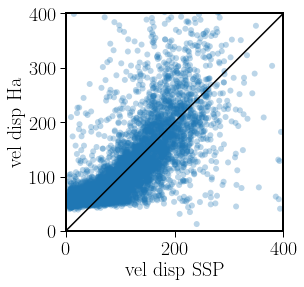

In [27]:
#vel_disp_ssp_cen
mask_now=tab_pe['vel_disp_Ha_cen']>0

fig = plt.figure()
ax = fig.add_subplot(111)

plt.scatter(tab_pe['vel_disp_ssp_cen'][mask_now],tab_pe['vel_disp_Ha_cen'][mask_now],alpha=0.3,edgecolor='none')
plt.plot([np.min(tab_pe['vel_disp_ssp_cen']),np.max(tab_pe['vel_disp_ssp_cen'])],[np.min(tab_pe['vel_disp_ssp_cen']),np.max(tab_pe['vel_disp_ssp_cen'])],color='black')
ax.set_xlim(0,400)
ax.set_ylim(0,400)
ax.set_aspect('equal', adjustable='box')
ax.set_xlabel('vel disp SSP')
ax.set_ylabel('vel disp Ha')

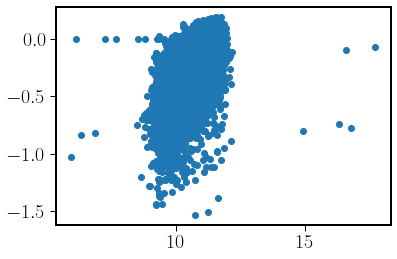

In [28]:
plt.scatter(tab_pe_select['log_Mass'],tab_pe_select['ZH_LW_Re_fit'])

In [29]:
list_columns(tab_pe_select.columns,1)

# ********************** 9.12.2021
# Correct ZH_LW_Re
#
#tab_pe_select['ZH_LW_Re_fit']=tab_pe_select['ZH_LW_Re']      

name                           
FoV                            
Re_kpc                         
e_log_Mass                     
log_SFR_Ha                     
e_log_SFR_Ha                   
log_Mass                       
log_SFR_ssp                    
log_NII_Ha_cen                 
e_log_NII_Ha_cen               
log_OIII_Hb_cen                
e_log_OIII_Hb_cen              
log_SII_Ha_cen                 
e_log_SII_Ha_cen               
log_OII_Hb_cen                 
e_log_OII_Hb_cen               
EW_Ha_cen                      
e_EW_Ha_cen                    
ZH_LW_Re_fit                   
e_ZH_LW_Re_fit                 
alpha_ZH_LW_Re_fit             
e_alpha_ZH_LW_Re_fit           
ZH_MW_Re_fit                   
e_ZH_MW_Re_fit                 
alpha_ZH_MW_Re_fit             
e_alpha_ZH_MW_Re_fit           
Age_LW_Re_fit                  
e_Age_LW_Re_fit                
alpha_Age_LW_Re_fit            
e_alpha_Age_LW_Re_fit          
Age_MW_Re_fit                  
e_Age_MW

In [30]:
hdu_KG = fits.open('tables/tab_KG_sel_add.fits')
tab_KG = Table(hdu_KG[1].data)
tab_s_MaNGA_KG=join(tab_s_MaNGA['name','cubename'],tab_KG['KGAS_ID','cubename','IAUNAME'],\
                    keys=['cubename'],join_type='left')

In [31]:
print(tab_s_MaNGA_KG['name'])
print(tab_pe_select['name'])

       name      
-----------------
manga-10843-12703
 manga-8078-12704
  manga-8078-1901
  manga-8078-1902
  manga-9193-1901
 manga-11836-1901
manga-12685-12701
manga-11836-12705
 manga-12083-1902
 manga-12085-1901
              ...
manga-12506-12701
 manga-12506-3702
 manga-12506-1902
 manga-11835-3702
manga-11835-12703
 manga-11835-9102
 manga-12506-9102
 manga-12506-6104
 manga-11022-1901
manga-11824-12704
 manga-11866-3702
Length = 285 rows
       name      
-----------------
manga-10001-12701
manga-10001-12702
manga-10001-12703
manga-10001-12704
manga-10001-12705
 manga-10001-1901
 manga-10001-1902
 manga-10001-3701
 manga-10001-3702
 manga-10001-3703
              ...
  manga-9894-1902
  manga-9894-3701
  manga-9894-3702
  manga-9894-3703
  manga-9894-3704
  manga-9894-6101
  manga-9894-6102
  manga-9894-6103
  manga-9894-6104
  manga-9894-9101
  manga-9894-9102
Length = 10220 rows


In [32]:
colnames_fe = ['name',
 'flux_[OII]3726.03_Re_fit',
 'e_flux_[OII]3726.03_Re_fit',
 'flux_[OII]3726.03_alpha_fit',
 'e_flux_[OII]3726.03_alpha_fit',
 'flux_[OII]3728.82_Re_fit',
 'e_flux_[OII]3728.82_Re_fit',
 'flux_[OII]3728.82_alpha_fit',
 'e_flux_[OII]3728.82_alpha_fit',
 'flux_HI3734.37_Re_fit',
 'e_flux_HI3734.37_Re_fit',
 'flux_HI3734.37_alpha_fit',
 'e_flux_HI3734.37_alpha_fit',
 'flux_HI3797.9_Re_fit',
 'e_flux_HI3797.9_Re_fit',
 'flux_HI3797.9_alpha_fit',
 'e_flux_HI3797.9_alpha_fit',
 'flux_HeI3888.65_Re_fit',
 'e_flux_HeI3888.65_Re_fit',
 'flux_HeI3888.65_alpha_fit',
 'e_flux_HeI3888.65_alpha_fit',
 'flux_HI3889.05_Re_fit',
 'e_flux_HI3889.05_Re_fit',
 'flux_HI3889.05_alpha_fit',
 'e_flux_HI3889.05_alpha_fit',
 'flux_HeI3964.73_Re_fit',
 'e_flux_HeI3964.73_Re_fit',
 'flux_HeI3964.73_alpha_fit',
 'e_flux_HeI3964.73_alpha_fit',
 'flux_[NeIII]3967.46_Re_fit',
 'e_flux_[NeIII]3967.46_Re_fit',
 'flux_[NeIII]3967.46_alpha_fit',
 'e_flux_[NeIII]3967.46_alpha_fit',
 'flux_CaII3968.47_Re_fit',
 'e_flux_CaII3968.47_Re_fit',
 'flux_CaII3968.47_alpha_fit',
 'e_flux_CaII3968.47_alpha_fit',
 'flux_Hepsilon3970.07_Re_fit',
 'e_flux_Hepsilon3970.07_Re_fit',
 'flux_Hepsilon3970.07_alpha_fit',
 'e_flux_Hepsilon3970.07_alpha_fit',
 'flux_Hdelta4101.77_Re_fit',
 'e_flux_Hdelta4101.77_Re_fit',
 'flux_Hdelta4101.77_alpha_fit',
 'e_flux_Hdelta4101.77_alpha_fit',
 'flux_Hgamma4340.49_Re_fit',
 'e_flux_Hgamma4340.49_Re_fit',
 'flux_Hgamma4340.49_alpha_fit',
 'e_flux_Hgamma4340.49_alpha_fit',
 'flux_Hbeta4861.36_Re_fit',
 'e_flux_Hbeta4861.36_Re_fit',
 'flux_Hbeta4861.36_alpha_fit',
 'e_flux_Hbeta4861.36_alpha_fit',
 'flux_[OIII]4958.91_Re_fit',
 'e_flux_[OIII]4958.91_Re_fit',
 'flux_[OIII]4958.91_alpha_fit',
 'e_flux_[OIII]4958.91_alpha_fit',
 'flux_[OIII]5006.84_Re_fit',
 'e_flux_[OIII]5006.84_Re_fit',
 'flux_[OIII]5006.84_alpha_fit',
 'e_flux_[OIII]5006.84_alpha_fit',
 'flux_HeI5015.68_Re_fit',
 'e_flux_HeI5015.68_Re_fit',
 'flux_HeI5015.68_alpha_fit',
 'e_flux_HeI5015.68_alpha_fit',
 'flux_[NI]5197.9_Re_fit',
 'e_flux_[NI]5197.9_Re_fit',
 'flux_[NI]5197.9_alpha_fit',
 'e_flux_[NI]5197.9_alpha_fit',
 'flux_[NI]5200.26_Re_fit',
 'e_flux_[NI]5200.26_Re_fit',
 'flux_[NI]5200.26_alpha_fit',
 'e_flux_[NI]5200.26_alpha_fit',
 'flux_HeI5876.0_Re_fit',
 'e_flux_HeI5876.0_Re_fit',
 'flux_HeI5876.0_alpha_fit',
 'e_flux_HeI5876.0_alpha_fit',
 'flux_NaI5889.95_Re_fit',
 'e_flux_NaI5889.95_Re_fit',
 'flux_NaI5889.95_alpha_fit',
 'e_flux_NaI5889.95_alpha_fit',
 'flux_NaI5895.92_Re_fit',
 'e_flux_NaI5895.92_Re_fit',
 'flux_NaI5895.92_alpha_fit',
 'e_flux_NaI5895.92_alpha_fit',
 'flux_[OI]6300.3_Re_fit',
 'e_flux_[OI]6300.3_Re_fit',
 'flux_[OI]6300.3_alpha_fit',
 'e_flux_[OI]6300.3_alpha_fit',
 'flux_[NII]6548.05_Re_fit',
 'e_flux_[NII]6548.05_Re_fit',
 'flux_[NII]6548.05_alpha_fit',
 'e_flux_[NII]6548.05_alpha_fit',
 'flux_Halpha6562.85_Re_fit',
 'e_flux_Halpha6562.85_Re_fit',
 'flux_Halpha6562.85_alpha_fit',
 'e_flux_Halpha6562.85_alpha_fit',
 'flux_[NII]6583.45_Re_fit',
 'e_flux_[NII]6583.45_Re_fit',
 'flux_[NII]6583.45_alpha_fit',
 'e_flux_[NII]6583.45_alpha_fit',
 'flux_[SII]6716.44_Re_fit',
 'e_flux_[SII]6716.44_Re_fit',
 'flux_[SII]6716.44_alpha_fit',
 'e_flux_[SII]6716.44_alpha_fit',
 'flux_[SII]6730.82_Re_fit',
 'e_flux_[SII]6730.82_Re_fit',
 'flux_[SII]6730.82_alpha_fit',
 'e_flux_[SII]6730.82_alpha_fit',
 'flux_[ArIII]7135.8_Re_fit',
 'e_flux_[ArIII]7135.8_Re_fit',
 'flux_[ArIII]7135.8_alpha_fit',
 'e_flux_[ArIII]7135.8_alpha_fit']

In [33]:
tab_pe_select_MaNGA = join(tab_s_MaNGA_KG,tab_pe_select,\
                    keys=['name'],join_type='left')
tab_all_select_MaNGA=join(tab_pe_select_MaNGA,tab_mag_select,keys=['name'],join_type='left')

tab_fe_sel = tab_fe[colnames_fe]

tab_all_select_MaNGA=join(tab_all_select_MaNGA,tab_fe_sel,keys=['name'],join_type='left')
tab_all_select_MaNGA=join(tab_all_select_MaNGA,tab_OH,keys=['name'],join_type='left')
tab_all_select_MaNGA=join(tab_all_select_MaNGA,tab_ind_select,keys=['name'],join_type='left')

print(len(tab_all_select_MaNGA))
#list_columns(tab_all_select_MaNGA.columns)


285


In [34]:
tab_s_SAMI = ascii.read('tables/s_SAMI.csv')
cubenames=[]
names=[]
for ID in tab_s_SAMI['ID']:
    cubename = 'KG-SAMI-'+str(ID)
    cubenames.append(cubename)
    name = 'SAMI'+str(ID)
    names.append(name)
tab_s_SAMI['cubename'] = np.array(cubenames)
tab_s_SAMI['name'] = np.array(names)
#tab_s_SAMI

tab_s_SAMI_KG=join(tab_s_SAMI['name','cubename'],tab_KG['KGAS_ID','cubename','IAUNAME'],\
                    keys=['cubename'],join_type='left')
tab_s_SAMI_KG


name,cubename,KGAS_ID,IAUNAME
str10,str17,int64,str20
SAMI107214,KG-SAMI-107214,88,J143535.15+005319.79
SAMI15847,KG-SAMI-15847,262,J142751.88+004515.30
SAMI16026,KG-SAMI-16026,320,J143008.28+004212.60
SAMI16487,KG-SAMI-16487,341,J143608.43+004445.92
SAMI197866,KG-SAMI-197866,19,J090947.08-003906.55
SAMI202398,KG-SAMI-202398,306,J083750.50-001543.56
SAMI202399,KG-SAMI-202399,328,J083749.76-001505.80
SAMI202480,KG-SAMI-202480,307,J083943.04-002013.09
SAMI202531,KG-SAMI-202531,191,J084039.84-002447.92


In [35]:
#
# Reading get_proc_elines table!
# 
get_proc_elines= "tables/get_proc_elines_SAMI_KG.csv"
col_proc_elines=header_columns(get_proc_elines,2)
tab_pe_SAMI=ascii.read(get_proc_elines, delimiter=',', guess=True, comment='\s*#', names=col_proc_elines,\
                      fill_values=[('BAD', np.nan)])

tab_pe_SAMI['name']
#list_columns(tab_pe_SAMI.columns)

SAMI107214
SAMI15847
SAMI16026
SAMI16487
SAMI197866
SAMI202398
SAMI202399
SAMI202480
SAMI202531
SAMI202636
SAMI202673


In [36]:
#print(tab_pe_SAMI.columns)
for cols in (tab_pe_SAMI.columns):
    tab_pe_SAMI[cols].units=''
    tab_pe_SAMI[cols].description=''
#print(tab_pe_SAMI[tab_pe_SAMI['name']=='manga-11757-9102'])

tab_pe_SAMI_select=tab_pe_SAMI['name','z_gas','z_stars','FoV','nx','ny','Re_kpc','log_Mass_corr','error_Mass','lSFR','e_lSFR','log_age_mean_LW','s_log_age_mean_LW','log_ZH_mean_LW','s_log_ZH_mean_LW','Av_ssp_stats_mean','Av_ssp_stats_stddev','Av_w1','e_Av_w','log_Mass','log_SFR_ssp','log_NII_Ha_cen_mean','log_NII_Ha_cen_stddev','log_OIII_Hb_cen_mean','log_OIII_Hb_cen_stddev','log_SII_Ha_cen_mean','log_SII_Ha_cen_stddev','log_OII_Hb_cen_mean','log_OII_Hb_cen_stddev','EW_Ha_cen_mean','EW_Ha_cen_stddev','ZH_LW_Re_fit','e_ZH_LW_Re_fit','alpha_ZH_LW_Re_fit','e_alpha_ZH_LW_Re_fit','ZH_MW_Re_fit','e_ZH_MW_Re_fit','alpha_ZH_MW_Re_fit','e_alpha_ZH_MW_Re_fit','Age_LW_Re_fit','e_Age_LW_Re_fit','alpha_Age_LW_Re_fit','e_alpha_Age_LW_Re_fit','Age_MW_Re_fit','e_Age_MW_Re_fit','alpha_Age_MW_Re_fit','e_alpha_Age_MW_Re_fit','Re_arc','DL','DA','P.A.','Ellipticity','Inclination','elip_ab','log_Mass_gas','rat_vel_sigma','e_rat_vel_sigma','log_SFR_SF','log_SFR_D_C','OH_O3N2_cen','e_OH_O3N2_cen','OH_N2_cen','e_OH_N2_cen','OH_ONS_cen','e_OH_ONS_cen','OH_R23_cen','e_OH_R23_cen','OH_pyqz_cen','e_OH_pyqz_cen','OH_t2_cen','e_OH_t2_cen','OH_M08_cen','e_OH_M08_cen','OH_T04_cen','e_OH_T04_cen','OH_dop_cen','e_OH_dop_cen','OH_O3N2_EPM09_cen','e_OH_O3N2_EPM09_cen','log_OI_Ha_cen','e_log_OI_Ha_cen','Ha_Hb_cen','e_Ha_Hb_cen','log_NII_Ha_Re','e_log_NII_Ha_Re','log_OIII_Hb_Re','e_log_OIII_Hb_Re','log_SII_Ha_Re','e_log_SII_Ha_Re','log_OII_Hb_Re','e_log_OII_Hb_Re','log_OI_Ha_Re','e_log_OI_Ha_Re','EW_Ha_Re','e_EW_Ha_Re','Ha_Hb_Re','e_Ha_Hb_Re','log_NII_Ha_ALL','e_log_NII_Ha_ALL','log_OIII_Hb_ALL','e_log_OIII_Hb_ALL','log_SII_Ha_ALL','e_log_SII_Ha_ALL','log_OII_Hb_ALL','e_log_OII_Hb_ALL','log_OI_Ha_ALL','e_log_OI_Ha_ALL','EW_Ha_ALL','e_EW_Ha_ALL','Ha_Hb_ALL','Sigma_Mass_cen','e_Sigma_Mass_cen','Sigma_Mass_Re','e_Sigma_Mass_Re','Sigma_Mass_ALL','e_Sigma_Mass_ALL','T30','ZH_T30','ZH_Re_T30','a_ZH_T30','T40','ZH_T40','ZH_Re_T40','a_ZH_T40','T50','ZH_T50','ZH_Re_T50','a_ZH_T50','T60','ZH_T60','ZH_Re_T60','a_ZH_T60','T70','ZH_T70','ZH_Re_T70','a_ZH_T70','T80','ZH_T80','ZH_Re_T80','a_ZH_T80','T90','ZH_T90','ZH_Re_T90','a_ZH_T90','T95','ZH_T95','ZH_Re_T95','a_ZH_T95','T99','ZH_T99','ZH_Re_T99','a_ZH_T99','log_Mass_gas_Av_gas_OH','log_Mass_gas_Av_ssp_OH','vel_ssp_2','e_vel_ssp_2','vel_Ha_2','e_vel_Ha_2','vel_ssp_1','e_vel_ssp_1','vel_Ha_1','e_vel_Ha_1','log_SFR_ssp_100Myr','log_SFR_ssp_10Myr','vel_disp_Ha_cen','vel_disp_ssp_cen','vel_disp_Ha_1Re','vel_disp_ssp_1Re','vel_disp_Ha_1Re_mean','vel_disp_ssp_1Re_mean','KIN_Ha_1','e_KIN_Ha_1','KIN_ssp_1','e_KIN_ssp_1','KIN_Ha_05','e_KIN_Ha_05','KIN_ssp_05','e_KIN_ssp_05','log_Mass_in_Re','ML_int','ML_avg','F_Ha_cen','e_F_Ha_cen','Re_kpc_Mass','R50_kpc_V','e_R50_kpc_V','R50_kpc_Mass','e_R50_kpc_Mass','log_Mass_corr_in_R50_V','e_log_Mass_corr_in_R50_V','log_Mass_gas_Av_gas_log_log']

print(tab_pe_SAMI_select[tab_pe_SAMI_select['name']=='manga-11834-9102'])
print(tab_pe_SAMI_select[tab_pe_SAMI_select['name']=='manga-11941-1902'])
#print(tab_all_select[tab_all_select['name']=='manga-11834-9102'])
#print(tab_pe_SAMI_select[tab_pe_SAMI_select['name']=='manga-11757-9102'])

tab_pe_SAMI_select.rename_column('lSFR','log_SFR_Ha')
tab_pe_SAMI_select.rename_column('e_lSFR','e_log_SFR_Ha')
tab_pe_SAMI_select.rename_column('log_NII_Ha_cen_mean','log_NII_Ha_cen')
tab_pe_SAMI_select.rename_column('log_NII_Ha_cen_stddev','e_log_NII_Ha_cen')  
tab_pe_SAMI_select.rename_column('log_OIII_Hb_cen_mean','log_OIII_Hb_cen')
tab_pe_SAMI_select.rename_column('log_OIII_Hb_cen_stddev','e_log_OIII_Hb_cen')
tab_pe_SAMI_select.rename_column('log_SII_Ha_cen_mean','log_SII_Ha_cen')
tab_pe_SAMI_select.rename_column('log_SII_Ha_cen_stddev','e_log_SII_Ha_cen')
tab_pe_SAMI_select.rename_column('log_OII_Hb_cen_mean','log_OII_Hb_cen')
tab_pe_SAMI_select.rename_column('log_OII_Hb_cen_stddev','e_log_OII_Hb_cen')
tab_pe_SAMI_select.rename_column('EW_Ha_cen_mean','EW_Ha_cen')
tab_pe_SAMI_select.rename_column('EW_Ha_cen_stddev','e_EW_Ha_cen')
tab_pe_SAMI_select.rename_column('rat_vel_sigma','vel_sigma_Re')# float64  
tab_pe_SAMI_select.rename_column('e_rat_vel_sigma','e_vel_sigma_Re')# float64  

tab_pe_SAMI_select.remove_column('log_age_mean_LW')
tab_pe_SAMI_select.remove_column('s_log_age_mean_LW')
tab_pe_SAMI_select.remove_column('log_ZH_mean_LW')
tab_pe_SAMI_select.remove_column('s_log_ZH_mean_LW')
tab_pe_SAMI_select.remove_column('Av_ssp_stats_mean')
tab_pe_SAMI_select.remove_column('Av_ssp_stats_stddev')
tab_pe_SAMI_select.remove_column('Av_w1') 
tab_pe_SAMI_select.remove_column('e_Av_w')
tab_pe_SAMI_select.remove_column('elip_ab')
tab_pe_SAMI_select.remove_column('Inclination')
tab_pe_SAMI_select.remove_column('z_gas')# float64  
tab_pe_SAMI_select.remove_column('z_stars')# float64  
tab_pe_SAMI_select.remove_column('nx')# int64  
tab_pe_SAMI_select.remove_column('ny')# int64  
tab_pe_SAMI_select.remove_column('log_Mass_corr')# float64  
tab_pe_SAMI_select.remove_column('vel_disp_Ha_1Re_mean') #float64  
tab_pe_SAMI_select.remove_column('vel_disp_ssp_1Re_mean')# float64  
tab_pe_SAMI_select.remove_column('KIN_Ha_1')# float64  
tab_pe_SAMI_select.remove_column('e_KIN_Ha_1')# float64  
tab_pe_SAMI_select.remove_column('KIN_ssp_1')# float64  
tab_pe_SAMI_select.remove_column('e_KIN_ssp_1')# float64  
tab_pe_SAMI_select.remove_column('KIN_Ha_05')# float64  
tab_pe_SAMI_select.remove_column('e_KIN_Ha_05')# float64  
tab_pe_SAMI_select.remove_column('KIN_ssp_05')# float64  
tab_pe_SAMI_select.remove_column('e_KIN_ssp_05')# float64 
tab_pe_SAMI_select.remove_column('Re_kpc_Mass')


tab_pe_SAMI_select.rename_column('error_Mass','e_log_Mass')# float64  

tab_val_select=tab_val_Re['name','Av_gas','e_Av_gas','Av_ssp','e_Av_ssp','Lambda','e_Lambda']
tab_pe_SAMI_select=join(tab_pe_SAMI_select,tab_val_select,keys=['name'],join_type='left')
tab_pe_SAMI_select.rename_column('Lambda','Lambda_Re')
tab_pe_SAMI_select.rename_column('e_Lambda','e_Lambda_Re')
tab_pe_SAMI_select.rename_column('Av_gas','Av_gas_Re')
tab_pe_SAMI_select.rename_column('e_Av_gas','e_Av_gas_Re')
tab_pe_SAMI_select.rename_column('Av_ssp','Av_ssp_Re')
tab_pe_SAMI_select.rename_column('e_Av_ssp','e_Av_ssp_Re')
tab_pe_SAMI_select.rename_column('P.A.','PA')
tab_pe_SAMI_select.rename_column('Ellipticity','ellip')                                                 
for cols in (tab_pe_SAMI_select.columns):
    tab_pe_SAMI_select[cols].units=''
    tab_pe_SAMI_select[cols].description=''

tab_pe_SAMI_info = ascii.read(dir_DR17+"tables/get_proc_elines_MaNGA.select.txt",delimiter=',', guess=True)#, fill_values=" ")  
for cols in (tab_pe_SAMI_select.columns):
    mask = (tab_pe_SAMI_info['NAME']==cols)
    tab_tmp=tab_pe_SAMI_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_pe_SAMI_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        #print(cols,',',units_now,',',desc_now)
        tab_pe_SAMI_select[cols].units=units_now
        tab_pe_SAMI_select[cols].description=desc_now

        
for cols in (tab_pe_SAMI_select.columns):
    #
    # Oxygen abundances
    #
    if (cols.find("OH")>-1):
        tab_pe_SAMI_select[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_pe_SAMI_select[cols].description='Error in the slope of the O/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_alpha_fit','')
                tab_pe_SAMI_select[cols].description='Slope of the O/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_cen','')            
                tab_pe_SAMI_select[cols].description='Error in Oxygen abundance using the calibrator '+cal+' at the central region'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_cen','')            
                tab_pe_SAMI_select[cols].description='Oxygen abundance using the calibrator '+cal+' at the central region'
  
#print(tab_pe_SAMI_select['name'].description)
#print(tab_pe_SAMI_select['name'].units)
#print(tab_pe_SAMI_info['UNITS'])


name z_gas z_stars ... e_log_Mass_corr_in_R50_V log_Mass_gas_Av_gas_log_log
---- ----- ------- ... ------------------------ ---------------------------
name z_gas z_stars ... e_log_Mass_corr_in_R50_V log_Mass_gas_Av_gas_log_log
---- ----- ------- ... ------------------------ ---------------------------


In [37]:
#
# Reading Mag table
#
get_mag_cubes="tables/get_mag_cubes_SAMI_KG_reshift.csv"
col_mag_cubes=header_columns_space(get_mag_cubes,2)
tab_mag_SAMI=ascii.read(get_mag_cubes, delimiter=',', guess=True, comment='\s*#', names=col_mag_cubes,\
                      fill_values=[('BAD', np.nan)])
#print(tab_pe)
tab_mag_SAMI.rename_column('name-obj', 'name')
tab_mag_SAMI.rename_column('R_band_mag', 'RJ_band_mag')
tab_mag_SAMI.rename_column('R_band_mag_error', 'RJ_band_mag_error')
tab_mag_SAMI.rename_column('R_band_abs_mag', 'RJ_band_abs_mag')
tab_mag_SAMI.rename_column('R_band_abs_mag_error', 'RJ_band_abs_mag_error')
tab_mag_SAMI.rename_column('error_C', 'e_C')
list_columns(col_mag_cubes)




name-obj                   i_band_mag_error           Y_centroid                 SN_at_R50                  
redshift                   i_band_abs_mag             Re                         error_SN_at_R50            
error_redshift             i_band_abs_mag_error       error_Re                   R_50                       
u_band_mag                 B_band_mag                 mean_S/N_at_Re             error_Re1                  
u_band_mag_error           B_band_mag_error           sigma_S/N_at_Re            B-V                        
u_band_abs_mag             B_band_abs_mag             ellipticy                  error_B-V                  
u_band_abs_mag_error       B_band_abs_mag_error       Pa                         B-R                        
g_band_mag                 V_band_mag                 R50                        error_B-R                  
g_band_mag_error           V_band_mag_error           error_R50                  log10_Mass/Msun_phot.      
g_band_abs_mag     

In [38]:
#
# Reading flux_elines_table
#
get_p_OH="tables/get_proc_OH_SAMI_KG.csv"
col_p_OH=header_columns_space(get_p_OH,2)
tab_OH_SAMI=ascii.read(get_p_OH, delimiter=',', guess=True, comment='\s*#', names=col_p_OH,\
                      fill_values=[('BAD', np.nan)])

print(len(tab_OH_SAMI))
list_columns(tab_OH_SAMI.columns)


#tab_mag.rename_column('name-obj', 'name')

169
name                            OH_Pil10_ON_Re_fit              e_OH_Cur20_R23_Re_fit           U_Dors_S_alpha_fit              
OH_Mar13_N2_Re_fit              e_OH_Pil10_ON_Re_fit            OH_Cur20_R23_alpha_fit          e_U_Dors_S_alpha_fit            
e_OH_Mar13_N2_Re_fit            OH_Pil10_ON_alpha_fit           e_OH_Cur20_R23_alpha_fit        U_Mor16_O23_fs_Re_fit           
OH_Mar13_N2_alpha_fit           e_OH_Pil10_ON_alpha_fit         OH_Cur20_O3N2_Re_fit            e_U_Mor16_O23_fs_Re_fit         
e_OH_Mar13_N2_alpha_fit         OH_Pil11_NS_Re_fit              e_OH_Cur20_O3N2_Re_fit          U_Mor16_O23_fs_alpha_fit        
OH_Mar13_O3N2_Re_fit            e_OH_Pil11_NS_Re_fit            OH_Cur20_O3N2_alpha_fit         e_U_Mor16_O23_fs_alpha_fit      
e_OH_Mar13_O3N2_Re_fit          OH_Pil11_NS_alpha_fit           e_OH_Cur20_O3N2_alpha_fit       U_Mor16_O23_ts_Re_fit           
OH_Mar13_O3N2_alpha_fit         e_OH_Pil11_NS_alpha_fit         OH_Cur20_O3S2_Re_fit         

In [39]:
tab_OH = tab_OH_SAMI
##################################################################################
#
# tab_OH metadata
#
##################################################################################
for cols in (tab_OH.columns):
    tab_OH[cols].units=''
    tab_OH[cols].description=''
    #
    # Oxygen abundances
    #
    if (cols.find("OH")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the O/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the O/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_OH")>-1):
                cal=cols.replace('e_OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in Oxygen abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Oxygen abundance using the calibrator '+cal+' at 1Re'
    #
    # NH
    #
    if (cols.find("NH")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_NH")>-1):
                cal=cols.replace('e_NH_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the N/H gradient using the calibrator '+cal
            else:
                cal=cols.replace('NH_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the N/H gradient using the calibrator '+cal
        else:
            if (cols.find("e_NH")>-1):
                cal=cols.replace('e_NH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in Nitrogen abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('NH_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Nitrogen abundance using the calibrator '+cal+' at 1Re'
    #
    # NO
    #
    if (cols.find("NO")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_NO")>-1):
                cal=cols.replace('e_NO_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the N/O gradient using the calibrator '+cal
            else:
                cal=cols.replace('NO_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the N/O gradient using the calibrator '+cal
        else:
            if (cols.find("e_NO")>-1):
                cal=cols.replace('e_NO_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in N/O abundance using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('NO_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='N/O abundance using the calibrator '+cal+' at 1Re'
    #
    # U
    #
    if (cols.find("U_")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_U")>-1):
                cal=cols.replace('e_U_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of the log(U) gradient using the calibrator '+cal
            else:
                cal=cols.replace('U_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the log(U) gradient using the calibrator '+cal
        else:
            if (cols.find("e_U_")>-1):
                cal=cols.replace('e_U_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in log(U) using the calibrator '+cal+' at 1Re'
            else:
                cal=cols.replace('U_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='log(U), ionization parameter using the calibrator '+cal+' at 1Re'
    #
    # Ne
    #
    if (cols.find("Ne_")>-1):
        tab_OH[cols].units='dex'
        if (cols.find("alpha")>-1):
            if (cols.find("e_Ne")>-1):
                cal=cols.replace('e_Ne_','')
                cal=cal.replace('_alpha_fit','')            
                tab_OH[cols].description='Error in the slope of n_e gradient using the '+cal+' estimator'
            else:
                cal=cols.replace('Ne_','')
                cal=cal.replace('_alpha_fit','')
                tab_OH[cols].description='Slope of the n_e gradient using the '+cal+' estimator'
        else:
            if (cols.find("e_Ne_")>-1):
                cal=cols.replace('e_Ne_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='Error in n_e using the '+cal+' estimator at 1Re'
            else:
                cal=cols.replace('Ne_','')
                cal=cal.replace('_Re_fit','')            
                tab_OH[cols].description='n_e, electron density using the '+cal+' estimator at 1Re'
#    print(cols,tab_OH[cols][0].dtype,tab_OH[cols].units,tab_OH[cols].description)
tab_OH_SAMI = tab_OH

In [40]:
#
# Reading flux_elines_table
#
get_p_fe="tables/get_proc_flux_elines_SAMI_KG.csv"
col_p_fe=header_columns_space(get_p_fe,2)
tab_fe_SAMI=ascii.read(get_p_fe, delimiter=',', guess=True, comment='\s*#', names=col_p_fe,\
                      fill_values=[('BAD', np.nan)])
print(len(tab_fe_SAMI))

165


In [41]:
for cols in (tab_fe_SAMI.columns):
    tab_fe_SAMI[cols].units=''
    tab_fe_SAMI[cols].description=''
    if (cols.find("flux")>-1):
        tab_fe_SAMI[cols].units='10^-16 erg/s/cm^2'
        a_text=cols.split("_")
        if (cols.find("e_flux")>-1):
            tab_fe_SAMI[cols].description='Error in the flux intensity of line '+a_text[2]+" at 1Re"
        else:
            tab_fe_SAMI[cols].description='Flux intensity of line '+a_text[1]+" at 1Re"
#    print(cols,tab_fe[cols][0].dtype,tab_fe[cols].units,tab_fe[cols].description)
#    print(cols)

In [44]:
#
# Reading Indices at Re
#
get_ind="tables/get_proc_indices_SAMI_KG.csv"
col_ind=header_columns_space(get_ind,2)
tab_ind_SAMI=ascii.read(get_ind, delimiter=',', guess=True, comment='\s*#', names=col_ind,\
                      fill_values=[('BAD', np.nan)])

print(tab_ind_SAMI.colnames)
print(tab_ind.colnames)

list_ind=['name', 'Hd_Re_fit', 'e_Hd_Re_fit', 'Hd_alpha_fit', 'e_Hd_alpha_fit', 'Hb_Re_fit', 'e_Hb_Re_fit', 'Hb_alpha_fit', 'e_Hb_alpha_fit', 'Mgb_Re_fit', 'e_Mgb_Re_fit', 'Mgb_alpha_fit', 'e_Mgb_alpha_fit', 'Fe5270_Re_fit', 'e_Fe5270_Re_fit', 'Fe5270_alpha_fit', 'e_Fe5270_alpha_fit', 'Fe5335_Re_fit', 'e_Fe5335_Re_fit', 'Fe5335_alpha_fit', 'e_Fe5335_alpha_fit', 'D4000_Re_fit1', 'e_D4000_Re_fit', 'D4000_alpha_fit', 'e_D4000_alpha_fit', 'Hdmod_Re_fit', 'e_Hdmod_Re_fit', 'Hdmod_alpha_fit', 'e_Hdmod_alpha_fit', 'Hg_Re_fit', 'e_Hg_Re_fit', 'Hg_alpha_fit', 'e_Hg_alpha_fit']
tab_ind_SAMI_select=tab_ind_SAMI[list_ind]
tab_ind_SAMI_select.rename_column('D4000_Re_fit1','D4000_Re_fit')


['name', 'D4000', 'e_D4000', 'D4000_Re_fit', 'e_D4000_fit', 'slope_D4000', 'e_slope_D4000', 'D4000_OH_fit', 'e_D4000_fit1', 'slope_D4000_OH', 'e_slope_D4000_OH', 'Sgas_OH_fit', 'e_Sgas_fit', 'slope_Sgas_OH', 'e_slope_Sgas', 'Hd_Re_fit', 'e_Hd_Re_fit', 'Hd_alpha_fit', 'e_Hd_alpha_fit', 'Hb_Re_fit', 'e_Hb_Re_fit', 'Hb_alpha_fit', 'e_Hb_alpha_fit', 'Mgb_Re_fit', 'e_Mgb_Re_fit', 'Mgb_alpha_fit', 'e_Mgb_alpha_fit', 'Fe5270_Re_fit', 'e_Fe5270_Re_fit', 'Fe5270_alpha_fit', 'e_Fe5270_alpha_fit', 'Fe5335_Re_fit', 'e_Fe5335_Re_fit', 'Fe5335_alpha_fit', 'e_Fe5335_alpha_fit', 'D4000_Re_fit1', 'e_D4000_Re_fit', 'D4000_alpha_fit', 'e_D4000_alpha_fit', 'Hdmod_Re_fit', 'e_Hdmod_Re_fit', 'Hdmod_alpha_fit', 'e_Hdmod_alpha_fit', 'Hg_Re_fit', 'e_Hg_Re_fit', 'Hg_alpha_fit', 'e_Hg_alpha_fit', 'SN_Re_fit', 'e_SN_Re_fit', 'SN_alpha_fit', 'e_SN_alpha_fit', 'e_Hd_Re_fit1', 'e_e_Hd_Re_fit', 'e_Hd_alpha_fit1', 'e_e_Hd_alpha_fit', 'e_Hb_Re_fit1', 'e_e_Hb_Re_fit', 'e_Hb_alpha_fit1', 'e_e_Hb_alpha_fit', 'e_Mgb_Re_fit

In [45]:
tab_ind_select = tab_ind_SAMI_select
for cols in (tab_ind_select.columns):
    tab_ind_select[cols].units=''
    tab_ind_select[cols].description=''
    if (cols.find("_")>-1):
        tab_ind_select[cols].units='Angstrom'
        if (cols.find("D4000")>-1):
            tab_ind_select[cols].units=''
        if (cols.find("SN")>-1):
            tab_ind_select[cols].units=''
        if (cols.find("alpha")>-1):
            tab_ind_select[cols].units=''
            if (cols[0]=="e"):
                cal=cols.replace('e_','')
                cal=cal.replace('_alpha_fit','')            
                tab_ind_select[cols].description='Error in the slope of the gradient of the '+cal+' index'
            else:
                cal=cols.replace('e_','')
                cal=cal.replace('_alpha_fit','')
                tab_ind_select[cols].description='Slope of the gradient of the '+cal+' index'
        else:
            if (cols[0]=="e"):
                cal=cols.replace('e_','')
                cal=cal.replace('_Rfit','')            
                tab_ind_select[cols].description='Error of the '+cal+' stellar index at 1Re'
            else:
                cal=cols.replace('OH_','')
                cal=cal.replace('_Re_fit','')            
                tab_ind_select[cols].description='Value of the '+cal+' stellar index at 1Re'
tab_ind_SAMI_select = tab_ind_select
#        print(cols,tab_ind_select[cols][0].dtype,tab_ind_select[cols].units,tab_ind_select[cols].description)

In [46]:
tab_mag_info = ascii.read(dir_DR17+"tables/get_mag_cubes_v3_1_1.txt",delimiter=',', guess=True)  
list_mag=list(tab_mag_info['NAME'])
tab_mag_SAMI_select=tab_mag_SAMI[list_mag]
for cols in (tab_mag_SAMI_select.columns):
    mask = (tab_mag_info['NAME']==cols)
    tab_tmp=tab_mag_info['DESC'][mask]
    if(len(list(tab_tmp))>0):
        desc_now=list(tab_tmp)[0]
        tab_tmp=tab_mag_info['UNITS'][mask]
        units_now=list(tab_tmp)[0]
        tab_mag_SAMI_select[cols].units=units_now
        tab_mag_SAMI_select[cols].description=desc_now
tab_mag_SAMI_select.rename_column('log10_Mass/Msun_phot.','log_Mass_phot')
tab_mag_SAMI_select.rename_column('error_Mass_phot.','e_log_Mass_phot')
        

In [47]:
#tab_fe_SAMI.colnames
#print(tab_fe.colnames)
print(tab_fe_SAMI.colnames)
print(len(tab_fe_sel.colnames))
print(len(tab_fe_SAMI.colnames))


['name', 'flux_[OII]3726.03_Re_fit', 'e_flux_[OII]3726.03_Re_fit', 'flux_[OII]3726.03_alpha_fit', 'e_flux_[OII]3726.03_alpha_fit', 'flux_[OII]3728.82_Re_fit', 'e_flux_[OII]3728.82_Re_fit', 'flux_[OII]3728.82_alpha_fit', 'e_flux_[OII]3728.82_alpha_fit', 'flux_HI3734.37_Re_fit', 'e_flux_HI3734.37_Re_fit', 'flux_HI3734.37_alpha_fit', 'e_flux_HI3734.37_alpha_fit', 'flux_HI3797.9_Re_fit', 'e_flux_HI3797.9_Re_fit', 'flux_HI3797.9_alpha_fit', 'e_flux_HI3797.9_alpha_fit', 'flux_HeI3888.65_Re_fit', 'e_flux_HeI3888.65_Re_fit', 'flux_HeI3888.65_alpha_fit', 'e_flux_HeI3888.65_alpha_fit', 'flux_HI3889.05_Re_fit', 'e_flux_HI3889.05_Re_fit', 'flux_HI3889.05_alpha_fit', 'e_flux_HI3889.05_alpha_fit', 'flux_HeI3964.73_Re_fit', 'e_flux_HeI3964.73_Re_fit', 'flux_HeI3964.73_alpha_fit', 'e_flux_HeI3964.73_alpha_fit', 'flux_[NeIII]3967.46_Re_fit', 'e_flux_[NeIII]3967.46_Re_fit', 'flux_[NeIII]3967.46_alpha_fit', 'e_flux_[NeIII]3967.46_alpha_fit', 'flux_CaII3968.47_Re_fit', 'e_flux_CaII3968.47_Re_fit', 'flux_C

In [48]:
print(tab_fe_SAMI['name'])
print(tab_s_SAMI_KG['name'])

   name   
----------
SAMI107214
 SAMI15847
 SAMI16026
 SAMI16487
SAMI197866
SAMI202399
SAMI202480
SAMI202636
SAMI202673
SAMI202745
       ...
 SAMI79693
 SAMI79810
 SAMI79850
 SAMI91627
 SAMI91689
 SAMI92944
 SAMI93020
 SAMI93023
 SAMI93062
 SAMI93604
 SAMI93674
Length = 165 rows
   name   
----------
SAMI107214
 SAMI15847
 SAMI16026
 SAMI16487
SAMI197866
SAMI202398
SAMI202399
SAMI202480
SAMI202531
SAMI202636
       ...
 SAMI79693
 SAMI79810
 SAMI79850
 SAMI91627
 SAMI91689
 SAMI92944
 SAMI93020
 SAMI93023
 SAMI93062
 SAMI93604
 SAMI93674
Length = 169 rows


In [49]:
tab_pe_select_SAMI = join(tab_s_SAMI_KG,tab_pe_SAMI_select,\
                    keys=['name'],join_type='left')
tab_all_select_SAMI=join(tab_pe_select_SAMI,tab_mag_SAMI_select,keys=['name'],join_type='left')
tab_all_select_SAMI=join(tab_all_select_SAMI,tab_fe_SAMI,keys=['name'],join_type='left')
tab_all_select_SAMI=join(tab_all_select_SAMI,tab_OH_SAMI,keys=['name'],join_type='left')
tab_all_select_SAMI=join(tab_all_select_SAMI,tab_ind_SAMI_select,keys=['name'],join_type='left')
print(len(tab_all_select_SAMI.colnames))
print(len(tab_all_select_MaNGA.colnames))

#list_columns(tab_all_select_SAMI.colnames)


490
490


In [50]:
def compare_columns(table1, table2):
    """
    Compare columns of two astropy tables.
    
    Parameters:
        table1 (Table): First table to compare.
        table2 (Table): Second table to compare.
        
    Returns:
        dict: A dictionary with keys:
              - 'common_columns': List of columns present in both tables.
              - 'only_in_table1': List of columns only in the first table.
              - 'only_in_table2': List of columns only in the second table.
    """
    cols1 = set(table1.colnames)
    cols2 = set(table2.colnames)
    
    # Find common and unique columns
    common_columns = cols1.intersection(cols2)
    only_in_table1 = cols1 - cols2
    only_in_table2 = cols2 - cols1
    
    return {
        'common_columns': list(common_columns),
        'only_in_table1': list(only_in_table1),
        'only_in_table2': list(only_in_table2)
    }

# Compare the columns
comparison = compare_columns(tab_all_select_MaNGA, tab_all_select_SAMI)
print(comparison)

{'common_columns': ['e_Age_MW_Re_fit', 'e_log_NII_Ha_Re', 'OH_Cur20_R23_Re_fit', 'Lambda_Re', 'g_band_abs_mag_error', 'V_band_mag_error', 'OH_Pil11_NS_Re_fit', 'e_OH_N2_cen', 'ZH_T70', 'log_OII_Hb_ALL', 'e_log_OI_Ha_Re', 'e_EW_Ha_ALL', 'e_flux_NaI5889.95_alpha_fit', 'e_Sigma_Mass_cen', 'e_OH_Pil16_R_Re_fit', 'B_band_mag', 'DA', 'log_OII_Hb_Re', 'DL', 'e_Hb_alpha_fit', 'flux_Hdelta4101.77_alpha_fit', 'e_U_Dors_O32_alpha_fit', 'e_U_Dors_S_Re_fit', 'flux_[NII]6548.05_Re_fit', 'e_flux_[OI]6300.3_alpha_fit', 'ML_int', 'Hb_Re_fit', 'T90', 'log_SII_Ha_cen', 'flux_NaI5895.92_Re_fit', 'OH_O3N2_cen', 'e_OH_Pil10_ON_alpha_fit', 'OH_Cur20_R3_Re_fit', 'flux_NaI5895.92_alpha_fit', 'e_OH_Cur20_O3N2_Re_fit', 'e_OH_Cur20_R23_Re_fit', 'flux_[OIII]4958.91_alpha_fit', 'a_ZH_T60', 'Hb_alpha_fit', 'e_EW_Ha_Re', 'e_OH_R23_cen', 'flux_HeI5015.68_alpha_fit', 'error_V-band_SB_at_Re', 'Ne_Oster_S_Re_fit', 'EW_Ha_ALL', 'e_Ha_Hb_Re', 'e_flux_NaI5889.95_Re_fit', 'OH_Mar13_N2_alpha_fit', 'e_OH_Pil11_NS_Re_fit', 'Hdm

In [51]:
vals = np.array(tab_all_select_SAMI['error_V-band_SB_at_Re'])
vals[vals=='']='0.15'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['error_V-band_SB_at_Re'] = vals

vals = np.array(tab_all_select_SAMI['e_flux_[ArIII]7135.8_Re_fit'])
vals[vals=='']='nan'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['e_flux_[ArIII]7135.8_Re_fit']=vals

vals = np.array(tab_all_select_SAMI['e_flux_[ArIII]7135.8_alpha_fit'])
vals[vals=='']='nan'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['e_flux_[ArIII]7135.8_alpha_fit']=vals


vals = np.array(tab_all_select_SAMI['e_OH_Mar13_N2_Re_fit'])
vals[vals=='']='nan'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['e_OH_Mar13_N2_Re_fit']=vals    

vals = np.array(tab_all_select_SAMI['e_OH_Mar13_N2_alpha_fit'])
vals[vals=='']='nan'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['e_OH_Mar13_N2_alpha_fit']=vals    

vals = np.array(tab_all_select_SAMI['e_OH_Mar13_O3N2_Re_fit'])
vals[vals=='']='nan'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['e_OH_Mar13_O3N2_Re_fit']=vals    

vals = np.array(tab_all_select_SAMI['e_OH_Mar13_O3N2_alpha_fit'])
vals[vals=='']='nan'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['e_OH_Mar13_O3N2_alpha_fit']=vals    


vals = np.array(tab_all_select_SAMI['e_OH_T04_Re_fit'])
vals[vals=='']='nan'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['e_OH_T04_Re_fit']=vals    

vals = np.array(tab_all_select_SAMI['e_OH_T04_alpha_fit'])
vals[vals=='']='nan'
vals = np.array(vals,dtype=float64)
tab_all_select_SAMI['e_OH_T04_alpha_fit']=vals    

for cols in tab_all_select_SAMI.colnames:
    if (cols.find('name')==-1):
        vals = np.array(tab_all_select_SAMI[cols])
        try:
            vals[vals=='']='nan'
            vals = np.array(vals,dtype=float64)
            tab_all_select_SAMI[cols]=vals    
        except:
            print(cols,'... not needed')
            
for cols in tab_all_select_MaNGA.colnames:
    if (cols.find('name')==-1):
        vals = np.array(tab_all_select_MaNGA[cols])
        try:
            vals[vals=='']='nan'
            vals = np.array(vals,dtype=float64)
            tab_all_select_MaNGA[cols]=vals    
        except:
            print(cols,'... not needed')
#e_OH_T04_Re_fit
#e_OH_Pet04_N2_lin_Re_fit

#e_OHe_OH_T04_Re_fit_Mar13_O3N2_Re_fit
#e_flux_[ArIII]7135.8_alpha_fit
#e_OH_Mar13_O3N2_Re_fit

#print(e_flux_[ArIII]7135.8_Re_fit)
#print(vals)
#print(tab_all_select_MaNGA['error_V-band_SB_at_Re'])


KGAS_ID ... not needed
IAUNAME ... not needed
KGAS_ID ... not needed
IAUNAME ... not needed


In [70]:
#tab_all_select_SAMI.remove_column('error_V-band_SB_at_Re')
#tab_all_select_MaNGA.remove_column('error_V-band_SB_at_Re')
#tab_all_KG.rename_column('D400_Re_fit','D4000_Re_fit')


Not needed


In [77]:
from astropy.table import vstack as tab_vstack

tab_all_KG = tab_vstack([tab_all_select_MaNGA, tab_all_select_SAMI])

try:
    tab_all_KG.rename_column('D400_Re_fit','D4000_Re_fit')
except:
    print('Not needed')

In [78]:
tab_all_KG.sort('KGAS_ID')

In [79]:
empty_primary = fits.PrimaryHDU()
hdu_KG_sel = fits.BinTableHDU(tab_all_KG)
hdu_KG_sel.name='Pipe3D'
hdu_list =fits.HDUList([empty_primary,hdu_KG_sel])
hdu_list.writeto('tables/KG_Pipe3D_table.fits',overwrite=True)

Text(0, 0.5, '12+log(O/H) Ho et al. @Re')

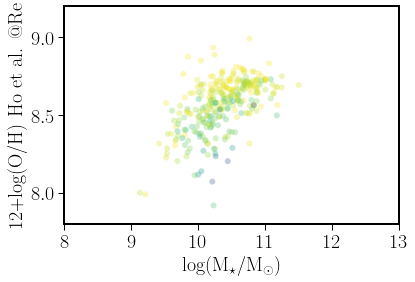

In [87]:
x_par=tab_all_KG['log_Mass']
y_par=tab_all_KG['OH_Ho_Re_fit']
z_par=tab_all_KG['EW_Ha_Re']
#plt.scatter(x_par[z_par<-6],y_par[z_par<-6],c=z_par[z_par<-6],alpha=0.05)
plt.scatter(x_par,y_par,c=z_par,alpha=0.3,edgecolor='none')
plt.xlim(8,13)
plt.ylim(7.8,9.2)
plt.xlabel(r'log(M$_\star$/M$_\odot$)')
plt.ylabel('12+log(O/H) Ho et al. @Re')



Text(0, 0.5, '12+log(O/H) O3N2 @Re')

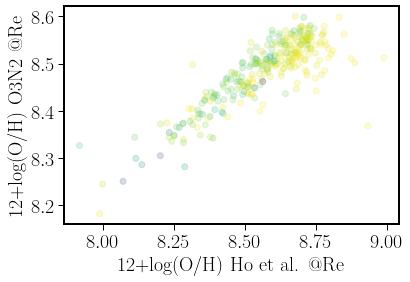

In [86]:
x_par=tab_all_KG['OH_Ho_Re_fit']
y_par=tab_all_KG['OH_Mar13_O3N2_Re_fit']
z_par=tab_all_KG['EW_Ha_Re']
plt.scatter(x_par,y_par,c=z_par,alpha=0.2)
plt.xlabel('12+log(O/H) Ho et al. @Re')
plt.ylabel('12+log(O/H) O3N2 @Re')

#print(len(tab_all['OH_Mar13_O3N2_Re_fit'][~np.isnan(tab_all['OH_Mar13_O3N2_Re_fit'])]))
#plt.scatter(x_par[z_par<-14],y_par[z_par<-14],c=z_par[z_par<-14],alpha=0.05)

#plt.xlim(8,13)
#plt.xlim(8.1,8.7)
#plt.ylim(8.1,8.7)

In [83]:
search_col(tab_all_KG,'D400')
search_col(tab_all_KG,'Age')


D4000_Re_fit
e_D4000_Re_fit
D4000_alpha_fit
e_D4000_alpha_fit
Age_LW_Re_fit
e_Age_LW_Re_fit
alpha_Age_LW_Re_fit
e_alpha_Age_LW_Re_fit
Age_MW_Re_fit
e_Age_MW_Re_fit
alpha_Age_MW_Re_fit
e_alpha_Age_MW_Re_fit


Text(0, 0.5, 'LW Age @Re')

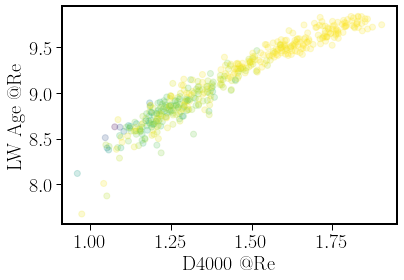

In [85]:
x_par=tab_all_KG['D4000_Re_fit']
y_par=tab_all_KG['Age_LW_Re_fit']
z_par=tab_all_KG['EW_Ha_Re']
plt.scatter(x_par,y_par,c=z_par,alpha=0.2)
plt.xlabel('D4000 @Re')
plt.ylabel('LW Age @Re')

In [89]:
list_columns(tab_all_KG.colnames)

name                                a_ZH_T70                            flux_[NeIII]3967.46_Re_fit          e_OH_Pil11_NS_alpha_fit             
cubename                            T80                                 e_flux_[NeIII]3967.46_Re_fit        OH_Cur20_RS32_Re_fit                
KGAS_ID                             ZH_T80                              flux_[NeIII]3967.46_alpha_fit       e_OH_Cur20_RS32_Re_fit              
IAUNAME                             ZH_Re_T80                           e_flux_[NeIII]3967.46_alpha_fit     OH_Cur20_RS32_alpha_fit             
FoV                                 a_ZH_T80                            flux_CaII3968.47_Re_fit             e_OH_Cur20_RS32_alpha_fit           
Re_kpc                              T90                                 e_flux_CaII3968.47_Re_fit           OH_Cur20_R3_Re_fit                  
e_log_Mass                          ZH_T90                              flux_CaII3968.47_alpha_fit          e_OH_Cur20_R3_Re_fit  

In [91]:
print(len(tab_all_KG.colnames))

490
